# <span style="color:seagreen"> Métodos de Aprendizagem Não Supervisionada </span>
## <span style="color:seagreen"> Estudo para a Musify Agency </span>

### Trabalho realizado por:

- Ana Lapa, nº93111
- João Ribeiro, nº93067
- Ricardo Frazão, nº92630
- Ricardo Mendes, nº92564
- Rita Bairros, nº92692

### Descrição das variáveis

Title - the name of the song

Artist - the singer/band of the song

Genre - the genre of the track

Year - the release year of the recording. Note that due to vagaries of releases, re-releases, re-issues and general madness, sometimes the release years are not what you'd expect.

Added - the earliest date you added the track to your collection.

Beats Per Minute (BPM) - The tempo of the song.

Energy - The energy of a song - the higher the value, the more energtic. song

Danceability - The higher the value, the easier it is to dance to this song.

Loudness (dB) - The higher the value, the louder the song.

Liveness - The higher the value, the more likely the song is a live recording.

Valence - The higher the value, the more positive mood for the song.

Duration - The length of the song.

Acousticness - The higher the value the more acoustic the song is.

Speechiness - The higher the value the more spoken word the song contains.

Popularity - The higher the value the more popular the song is.

In [64]:
# Packages
library(psych)
library(corrplot)
library(cluster)
library(tidyverse)
library(caret)
library(factoextra)
library(mclust)

options(repr.plot.width=6, repr.plot.height=6)

## Leitura e tratamento do dataset

In [2]:
# Leitura e visualização do dataset 
bd <- read.csv2("top10s.csv")
bd <- bd[,-1]
head(bd)

title,artist,top.genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,gender,type
My First Kiss - feat. Ke$ha,3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,62,male,duo
She Looks So Perfect,5 Seconds of Summer,boy band,2014,160,95,49,-4,33,44,202,0,13,71,male,band
Say Something,A Great Big World,neo mellow,2014,138,15,45,-9,9,9,229,87,3,61,male,duo
Whataya Want from Me,Adam Lambert,australian pop,2010,186,68,44,-5,6,45,227,1,5,66,male,solo
If I Had You,Adam Lambert,australian pop,2010,131,91,65,-4,37,79,228,1,11,59,male,solo
Someone Like You,Adele,british soul,2011,135,33,56,-8,10,28,285,89,3,80,female,solo


In [3]:
# Características da base de dados 
str(bd)

'data.frame':	603 obs. of  16 variables:
 $ title    : Factor w/ 584 levels "#Beautiful","#SELFIE",..: 333 426 414 555 234 438 405 420 198 21 ...
 $ artist   : Factor w/ 184 levels "3OH!3","5 Seconds of Summer",..: 1 2 3 4 4 5 5 5 5 5 ...
 $ top.genre: Factor w/ 50 levels "acoustic pop",..: 26 13 47 8 8 14 14 14 14 14 ...
 $ year     : int  2010 2014 2014 2010 2010 2011 2011 2012 2015 2016 ...
 $ bpm      : int  138 160 138 186 131 135 105 108 158 142 ...
 $ nrgy     : int  89 95 15 68 91 33 76 68 45 28 ...
 $ dnce     : int  68 49 45 44 65 56 73 61 48 59 ...
 $ dB       : int  -4 -4 -9 -5 -4 -8 -5 -4 -6 -5 ...
 $ live     : int  36 33 9 6 37 10 5 13 9 15 ...
 $ val      : int  83 44 9 45 79 28 52 47 29 34 ...
 $ dur      : int  192 202 229 227 228 285 228 242 295 272 ...
 $ acous    : int  1 0 87 1 1 89 13 0 34 88 ...
 $ spch     : int  8 13 3 5 11 3 3 3 3 3 ...
 $ pop      : int  62 71 61 66 59 80 76 76 73 71 ...
 $ gender   : Factor w/ 3 levels "both","female",..: 3 3 3 3 3 2 2 2 2 

O dataset contém 603 observações e 16 variáveis, das quais as duas últimas foram criadas de modo a alcançar o objetivo.

In [4]:
# Conversão da variável "year" em categórica
bd$year <- as.factor(bd$year)

In [5]:
# Medidas descritivas
summary(bd)

                                             title               artist   
 A Little Party Never Killed Nobody (All We Got):  2   Katy Perry   : 17  
 All I Ask                                      :  2   Justin Bieber: 16  
 Castle Walls (feat. Christina Aguilera)        :  2   Maroon 5     : 15  
 Company                                        :  2   Rihanna      : 15  
 First Time                                     :  2   Lady Gaga    : 14  
 Hello                                          :  2   Bruno Mars   : 13  
 (Other)                                        :591   (Other)      :513  
         top.genre        year          bpm             nrgy     
 dance pop    :327   2015   : 95   Min.   :  0.0   Min.   : 0.0  
 pop          : 60   2016   : 80   1st Qu.:100.0   1st Qu.:61.0  
 canadian pop : 34   2013   : 71   Median :120.0   Median :74.0  
 barbadian pop: 15   2017   : 65   Mean   :118.5   Mean   :70.5  
 boy band     : 15   2018   : 64   3rd Qu.:129.0   3rd Qu.:82.0  
 ele

Através da análise das medidas descritivas é possivel averiguar a inexistência de valores omissos.

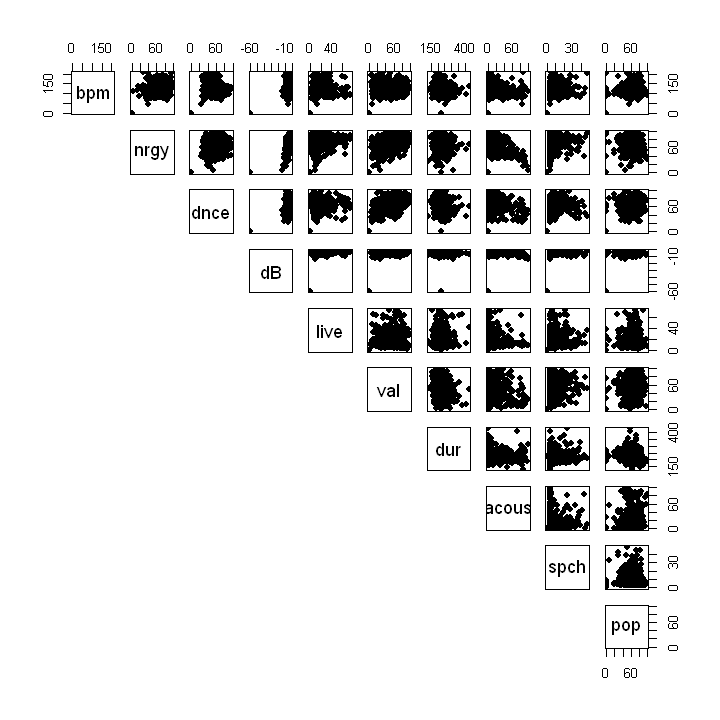

In [6]:
# scatterplot
pairs(bd[,5:14], pch = 19, lower.panel = NULL)

In [7]:
names(bd)

[1] "title"     "artist"    "top.genre" "year"      "bpm"       "nrgy"     
 [7] "dnce"      "dB"        "live"      "val"       "dur"       "acous"    
[13] "spch"      "pop"       "gender"    "type"

[1] 186   0 181 184 186  43 176 192 174 190 202 184 175 186 192 180 190 201 178
[20] 190 182 206 185 175 174 192 186 180

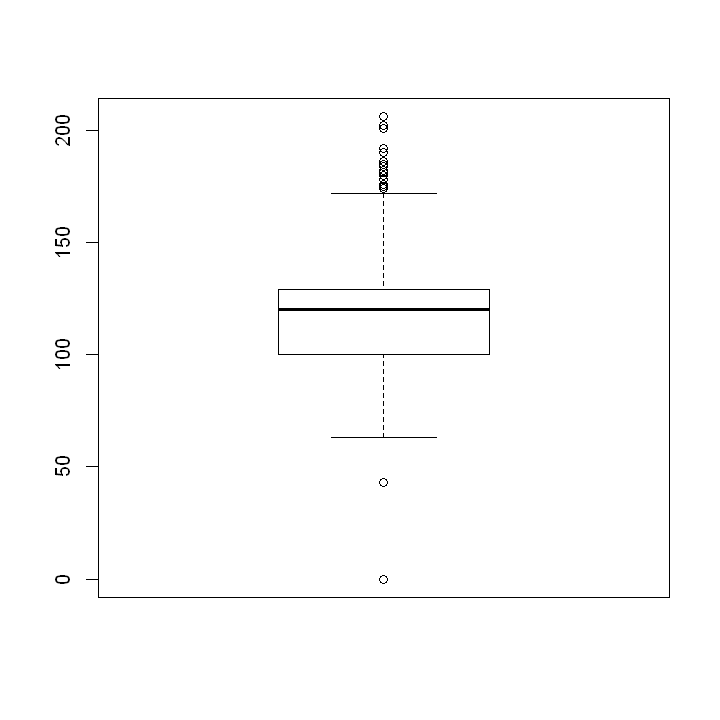

In [8]:
boxplot(bd$bpm, plot = TRUE)$out

Através da observação do boxplot acima apresentado, é possível verificar a existência de uma música que tem 0 batidas por minuto. Este valor revela um outlier, visto que em termos lógicos não é musicalmente possível.

In [9]:
bd$artist[bd$bpm == 0]
bd$title[bd$bpm == 0]

[1] Adele
184 Levels: 3OH!3 5 Seconds of Summer A Great Big World Adam Lambert ... Zedd

[1] Million Years Ago
584 Levels: #Beautiful #SELFIE #thatPOWER ... Youth (feat. Khalid)

[1] -60 -10 -12 -10 -10 -11 -11 -15 -10 -11 -10 -11 -10 -13 -10

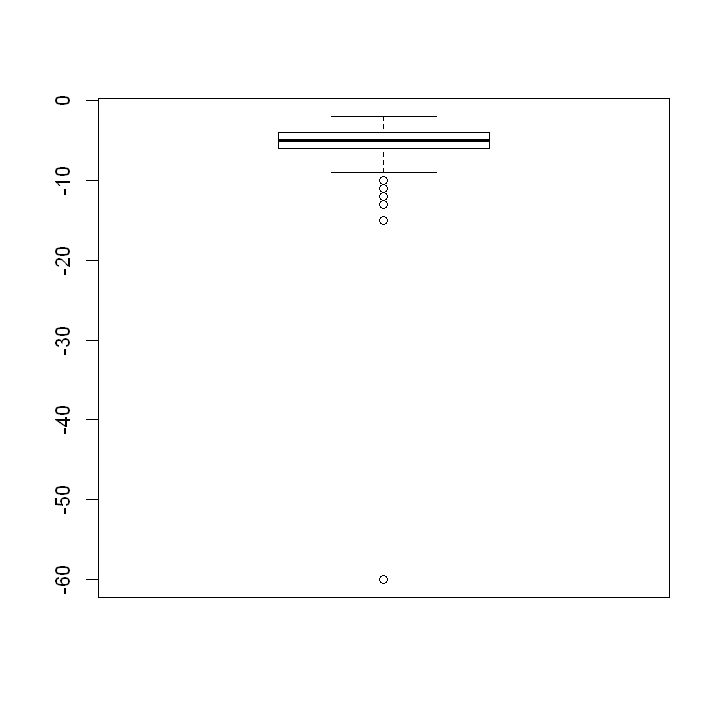

In [10]:
boxplot(bd$dB, plot = TRUE)$out

Com base no boxplot relativo à variável "dB", é possível constatar a existência de um valor que em muito se distancia dos restantes (-60). Assim, conclui-se que estamos na presença de um outlier.

In [11]:
bd$artist[bd$dB == -60]
bd$title[bd$dB == -60]

[1] Adele
184 Levels: 3OH!3 5 Seconds of Summer A Great Big World Adam Lambert ... Zedd

[1] Million Years Ago
584 Levels: #Beautiful #SELFIE #thatPOWER ... Youth (feat. Khalid)

Uma vez efetuados os procedimentos e as respetivas interpretações acima apresentados, verificou-se que ambas as irregularidades são referentes à mesma observação. Assim, apenas foi realizada a remoção desta.

In [12]:
# Remover o outlier encontrado
bd <- bd[-which(bd$dB == -60),]

In [13]:
str(bd)

'data.frame':	602 obs. of  16 variables:
 $ title    : Factor w/ 584 levels "#Beautiful","#SELFIE",..: 333 426 414 555 234 438 405 420 198 21 ...
 $ artist   : Factor w/ 184 levels "3OH!3","5 Seconds of Summer",..: 1 2 3 4 4 5 5 5 5 5 ...
 $ top.genre: Factor w/ 50 levels "acoustic pop",..: 26 13 47 8 8 14 14 14 14 14 ...
 $ year     : Factor w/ 10 levels "2010","2011",..: 1 5 5 1 1 2 2 3 6 7 ...
 $ bpm      : int  138 160 138 186 131 135 105 108 158 142 ...
 $ nrgy     : int  89 95 15 68 91 33 76 68 45 28 ...
 $ dnce     : int  68 49 45 44 65 56 73 61 48 59 ...
 $ dB       : int  -4 -4 -9 -5 -4 -8 -5 -4 -6 -5 ...
 $ live     : int  36 33 9 6 37 10 5 13 9 15 ...
 $ val      : int  83 44 9 45 79 28 52 47 29 34 ...
 $ dur      : int  192 202 229 227 228 285 228 242 295 272 ...
 $ acous    : int  1 0 87 1 1 89 13 0 34 88 ...
 $ spch     : int  8 13 3 5 11 3 3 3 3 3 ...
 $ pop      : int  62 71 61 66 59 80 76 76 73 71 ...
 $ gender   : Factor w/ 3 levels "both","female",..: 3 3 3 3 3 2 2 2

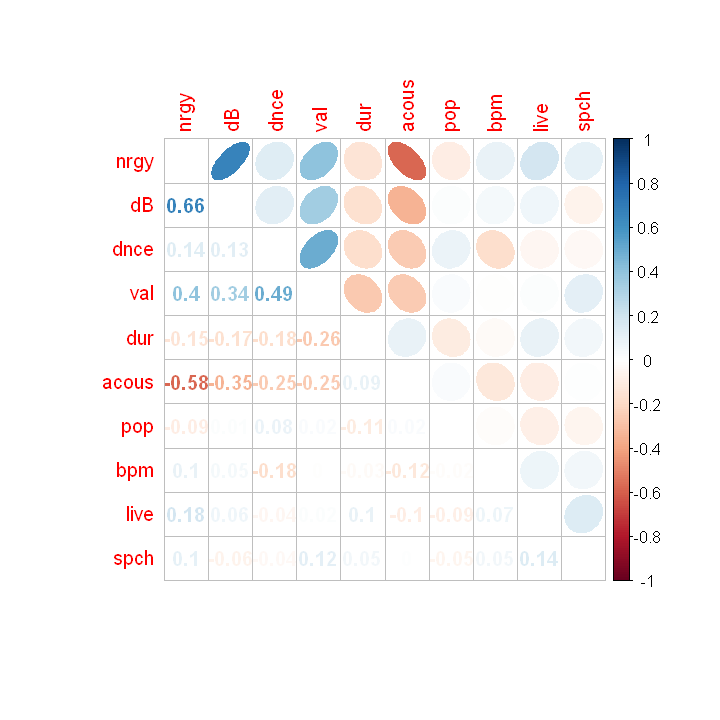

In [14]:
# corrplot
correlation <- cor(bd[,5:14])
par(oma = c(2, 2, 2, 2))   
corrplot.mixed(correlation,
        order = "hclust",   
        tl.pos = "lt",      
        upper = "ellipse")

In [15]:
# Matriz de correlação
round(correlation, 3)

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
bpm,1.000,0.095,-0.176,0.049,0.072,-0.002,-0.029,-0.121,0.051,-0.018
nrgy,0.095,1.000,0.137,0.664,0.180,0.401,-0.145,-0.577,0.101,-0.094
dnce,-0.176,0.137,1.000,0.130,-0.041,0.495,-0.180,-0.251,-0.038,0.082
dB,0.049,0.664,0.130,1.000,0.063,0.343,-0.168,-0.350,-0.061,0.014
live,0.072,0.180,-0.041,0.063,1.000,0.015,0.099,-0.100,0.142,-0.088
val,-0.002,0.401,0.495,0.343,0.015,1.000,-0.263,-0.253,0.118,0.022
dur,-0.029,-0.145,-0.180,-0.168,0.099,-0.263,1.000,0.092,0.055,-0.106
acous,-0.121,-0.577,-0.251,-0.350,-0.100,-0.253,0.092,1.000,0.001,0.022
spch,0.051,0.101,-0.038,-0.061,0.142,0.118,0.055,0.001,1.000,-0.051
pop,-0.018,-0.094,0.082,0.014,-0.088,0.022,-0.106,0.022,-0.051,1.000


## Análise das componentes principais

In [16]:
# Bartlett test and KMO
cortest.bartlett(correlation)
KMO(correlation)

Warning message in cortest.bartlett(correlation):
"n not specified, 100 used"

$chisq
[1] 176.0221

$p.value
[1] 2.124994e-17

$df
[1] 45

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = correlation)
Overall MSA =  0.62
MSA for each item = 
  bpm  nrgy  dnce    dB  live   val   dur acous  spch   pop 
 0.47  0.60  0.54  0.65  0.65  0.66  0.76  0.65  0.36  0.50 

Com base no Bartlett test, o p-value é menor que 0.05, pelo que se rejeita a H0. Isto mostra que é relevante utilizar PCA neste dataset pois existem variáveis correlacionadas.
O valor do KMO é 0.62, sendo por isto considerado medíocre.

In [17]:
# Estandardização dos dados
bd1 <- scale(bd[,5:14])
head(bd1)

bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0.7912027,1.1437764,0.26759033,0.8731213,1.3897145,1.3681156,-0.95646115,-0.6426170,-0.04973436,-0.32445721
1.6950833,1.5171784,-1.17954829,0.8731213,1.1605905,-0.3705776,-0.66370662,-0.6907513,0.61857115,0.30606975
0.7912027,-3.4615156,-1.48420905,-2.0600206,-0.6724016,-1.9309433,0.12673062,3.4969334,-0.71803988,-0.39451576
2.7633058,-0.1631308,-1.56037424,0.2864929,-0.9015256,-0.3259957,0.06817971,-0.6426170,-0.45071767,-0.04422301
0.5036043,1.2682437,0.03909476,0.8731213,1.4660891,1.1897881,0.09745516,-0.6426170,0.35124894,-0.53463286
0.6679462,-2.3413094,-0.64639196,-1.4733922,-0.5960269,-1.0838876,1.76615598,3.5932020,-0.71803988,0.93659671


In [18]:
# Assumiu-se como número de componentes o número de variáveis (10)
pc10 <- principal(bd1, nfactors = 10, rotate = "none", scores = TRUE)

In [19]:
# Valores Próprios representa a variância das componentes principais
# Critério de Kaiser (valores próprios > 1)
round(pc10$values,3)

[1] 2.586 1.471 1.126 1.019 0.906 0.813 0.801 0.647 0.392 0.239

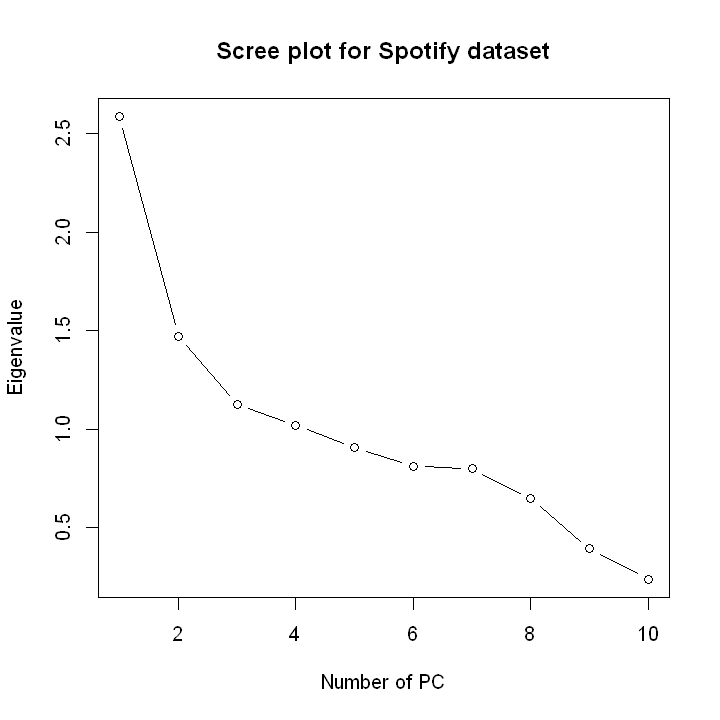

In [20]:
# Screeplot
plot(pc10$values, type = "b", main = "Scree plot for Spotify dataset", xlab = "Number of PC", ylab = "Eigenvalue")

O critério de Kaiser sugere a existência de 4 componentes principais, 
enquanto que através do scree plot sugere-se a existência de 3 componentes principais.

In [21]:
# Vetores Próprios - Componentes dos "loadings"
pc10$loadings


Loadings:
      PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9    PC10  
bpm           0.438 -0.427  0.556 -0.219  0.401  0.226  0.198              
nrgy   0.834  0.307        -0.109        -0.209                       0.374
dnce   0.483 -0.551  0.384                0.386  0.168         0.355       
dB     0.734  0.120 -0.279 -0.163        -0.332 -0.106  0.309  0.259 -0.224
live   0.150  0.541  0.328         0.409  0.369 -0.520                     
val    0.695 -0.287  0.305  0.162 -0.149                0.348 -0.396       
dur   -0.354  0.416  0.222 -0.378  0.326         0.556  0.303              
acous -0.689 -0.182  0.128  0.126 -0.113 -0.179 -0.306  0.526  0.112  0.178
spch          0.326  0.621  0.524        -0.399  0.160 -0.141  0.125       
pop          -0.422 -0.238  0.453  0.731 -0.115                            

                 PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10
SS loadings    2.586 1.471 1.126 1.019 0.906 0.813 0.801 0.647 0.392 0.239
Pr

Dada a divergência entre o número de componentes principais sugerido pelo critério de Kaiser e pelo scree plot, optou-se por utilizar quatro componentes principais. Esta escolha teve por base a variância explicada, dado que é mais significativa ao utilizar 4 componentes principais em vez de 3 (PC4 explica 60,8% dos dados do dataset)

In [22]:
# Verificar os "loadings" para quatro componentes principais 
pc4 <- principal(bd1, nfactors = 4, rotate = "none")
pc4

Principal Components Analysis
Call: principal(r = bd1, nfactors = 4, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
        PC1   PC2   PC3   PC4   h2   u2 com
bpm    0.09  0.44 -0.43  0.56 0.69 0.31 2.9
nrgy   0.83  0.31 -0.10 -0.11 0.81 0.19 1.3
dnce   0.48 -0.55  0.38 -0.07 0.69 0.31 2.8
dB     0.73  0.12 -0.28 -0.16 0.66 0.34 1.5
live   0.15  0.54  0.33  0.03 0.42 0.58 1.8
val    0.70 -0.29  0.30  0.16 0.69 0.31 1.9
dur   -0.35  0.42  0.22 -0.38 0.49 0.51 3.5
acous -0.69 -0.18  0.13  0.13 0.54 0.46 1.3
spch   0.07  0.33  0.62  0.52 0.77 0.23 2.5
pop   -0.01 -0.42 -0.24  0.45 0.44 0.56 2.5

                       PC1  PC2  PC3  PC4
SS loadings           2.59 1.47 1.13 1.02
Proportion Var        0.26 0.15 0.11 0.10
Cumulative Var        0.26 0.41 0.52 0.62
Proportion Explained  0.42 0.24 0.18 0.16
Cumulative Proportion 0.42 0.65 0.84 1.00

Mean item complexity =  2.2
Test of the hypothesis that 4 components are sufficient.

The root mean square 

In [23]:
# Rotação das quatro componentes principais, utilizando varimax
pc4r <- principal(bd1, nfactors = 4, rotate = "varimax")
pc4r$loadings


Loadings:
      RC1    RC4    RC2    RC3   
bpm    0.219 -0.701  0.301  0.247
nrgy   0.889                0.138
dnce   0.201  0.765  0.246       
dB     0.801               -0.109
live   0.197 -0.105 -0.367  0.489
val    0.449  0.537  0.332  0.292
dur   -0.203 -0.114 -0.660       
acous -0.732                     
spch                        0.873
pop   -0.134         0.645       

                 RC1   RC4   RC2   RC3
SS loadings    2.362 1.397 1.254 1.190
Proportion Var 0.236 0.140 0.125 0.119
Cumulative Var 0.236 0.376 0.501 0.620

In [24]:
# Communalities
round(pc4r$communality,2)

bpm  nrgy  dnce    dB  live   val   dur acous  spch   pop 
 0.69  0.81  0.69  0.66  0.42  0.69  0.49  0.54  0.77  0.44

In [25]:
# Cálculo dos "scores"
pc4sc <- principal(bd1, nfactors = 4, rotate = "none", scores = TRUE)
round(pc4sc$scores,3)

,PC1,PC2,PC3,PC4
1,1.443,0.580,0.030,0.515
2,0.832,1.781,-1.089,1.298
3,-3.477,-0.413,-0.602,0.751
4,-0.161,1.140,-2.287,1.156
5,1.254,1.117,0.498,0.057
6,-2.818,-0.549,-0.209,0.543
7,0.215,-0.987,-0.477,-0.589
8,0.140,-0.202,-0.810,-0.744
9,-1.652,0.727,-1.280,0.185
10,-2.206,-0.303,-0.412,0.345


In [26]:
mean(pc4sc$scores[,1])

[1] -6.335919e-19

In [27]:
sd(pc4sc$scores[,1])

[1] 1

In [28]:
# Verificar os "loadings" para cinco componentes principais 
pc5 <- principal(bd1, nfactors = 5, rotate = "none")
pc5

Principal Components Analysis
Call: principal(r = bd1, nfactors = 5, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
        PC1   PC2   PC3   PC4   PC5   h2    u2 com
bpm    0.09  0.44 -0.43  0.56 -0.22 0.74 0.261 3.2
nrgy   0.83  0.31 -0.10 -0.11  0.04 0.81 0.186 1.3
dnce   0.48 -0.55  0.38 -0.07  0.02 0.69 0.310 2.8
dB     0.73  0.12 -0.28 -0.16  0.09 0.67 0.335 1.5
live   0.15  0.54  0.33  0.03  0.41 0.59 0.409 2.8
val    0.70 -0.29  0.30  0.16 -0.15 0.71 0.292 2.0
dur   -0.35  0.42  0.22 -0.38  0.33 0.60 0.403 4.5
acous -0.69 -0.18  0.13  0.13 -0.11 0.55 0.447 1.3
spch   0.07  0.33  0.62  0.52 -0.08 0.78 0.223 2.6
pop   -0.01 -0.42 -0.24  0.45  0.73 0.97 0.026 2.6

                       PC1  PC2  PC3  PC4  PC5
SS loadings           2.59 1.47 1.13 1.02 0.91
Proportion Var        0.26 0.15 0.11 0.10 0.09
Cumulative Var        0.26 0.41 0.52 0.62 0.71
Proportion Explained  0.36 0.21 0.16 0.14 0.13
Cumulative Proportion 0.36 0.57 0.73 0.87 1.00



In [29]:
# Rotação das cinco componentes principais, utilizando varimax
pc5r <- principal(bd1, nfactors = 5, rotate = "varimax")
pc5r$loadings


Loadings:
      RC1    RC4    RC2    RC3    RC5   
bpm    0.167 -0.780 -0.243  0.205       
nrgy   0.889                0.119       
dnce   0.212  0.712 -0.337  0.127       
dB     0.801               -0.121       
live   0.273         0.554  0.448       
val    0.431  0.423 -0.474  0.344       
dur   -0.136         0.752        -0.111
acous -0.742                            
spch                        0.874       
pop                                0.981

                 RC1   RC4   RC2   RC3   RC5
SS loadings    2.342 1.302 1.286 1.174 1.005
Proportion Var 0.234 0.130 0.129 0.117 0.100
Cumulative Var 0.234 0.364 0.493 0.610 0.711

Em cada componente apenas se irá dar destaque às variaveis que apresentem os maiores loadings em módulo
Se os valores dos loadings forem positivos, significa que à medida que a PC aumenta, a respetiva variável também aumenta. Caso os valores dos loadings forem negativos, um aumento da PC provocará uma diminuição da variável. 

In [30]:
## RC1: eletronic - energia e o volume aumentam enquanto a acústica diminui
## RC2: sad_long_songs - a duração e o facto de ser ao vivo aumenta enquanto que a positividade diminui
## RC3: rap - a quantidade de palavras aumenta
## RC4: slows - a vontade de dançar aumenta enquanto o ritmo da música diminui 
## RC5: popular - a popularidade da música aumenta 

In [31]:
# Communalities
round(pc5r$communality,2)

bpm  nrgy  dnce    dB  live   val   dur acous  spch   pop 
 0.74  0.81  0.69  0.67  0.59  0.71  0.60  0.55  0.78  0.97

In [32]:
# Cálculo dos "scores"
pc5sc <- principal(bd1, nfactors = 5, rotate = "none", scores = TRUE)
round(pc5sc$scores,3)

,PC1,PC2,PC3,PC4,PC5
1,1.443,0.580,0.030,0.515,-0.171
2,0.832,1.781,-1.089,1.298,0.334
3,-3.477,-0.413,-0.602,0.751,-1.210
4,-0.161,1.140,-2.287,1.156,-0.935
5,1.254,1.117,0.498,0.057,0.137
6,-2.818,-0.549,-0.209,0.543,0.492
7,0.215,-0.987,-0.477,-0.589,0.389
8,0.140,-0.202,-0.810,-0.744,0.909
9,-1.652,0.727,-1.280,0.185,0.390
10,-2.206,-0.303,-0.412,0.345,0.075


In [33]:
mean(pc5sc$scores[,1])

[1] -3.452157e-18

In [34]:
sd(pc5sc$scores[,1])

[1] 1

Com base na interpretação feita, decidiu-se utilizar 5 componentes principais em vez de 4.

In [35]:
#Adicionar as variáveis score ao dataset inicial (bd) com os nomes dados
bd$eletronic <- pc5sc$scores[,1] 
bd$sad_long_songs <- pc5sc$scores[,2]  
bd$rap <- pc5sc$scores[,3]  
bd$slows <- pc5sc$scores[,4] 
bd$popular <- pc5sc$scores[,5] 

In [36]:
head(bd)

title,artist,top.genre,year,bpm,nrgy,dnce,dB,live,val,...,acous,spch,pop,gender,type,eletronic,sad_long_songs,rap,slows,popular
My First Kiss - feat. Ke$ha,3OH!3,dance pop,2010,138,89,68,-4,36,83,...,1,8,62,male,duo,1.4428929,0.5804548,0.03016965,0.51523508,-0.1707903
She Looks So Perfect,5 Seconds of Summer,boy band,2014,160,95,49,-4,33,44,...,0,13,71,male,band,0.8317071,1.7814503,-1.08902068,1.29780683,0.3340490
Say Something,A Great Big World,neo mellow,2014,138,15,45,-9,9,9,...,87,3,61,male,duo,-3.4774363,-0.4129123,-0.60224354,0.75147096,-1.2097638
Whataya Want from Me,Adam Lambert,australian pop,2010,186,68,44,-5,6,45,...,1,5,66,male,solo,-0.1605567,1.1401985,-2.28650948,1.15628855,-0.9353758
If I Had You,Adam Lambert,australian pop,2010,131,91,65,-4,37,79,...,1,11,59,male,solo,1.2540979,1.1167758,0.49810885,0.05704283,0.1370803
Someone Like You,Adele,british soul,2011,135,33,56,-8,10,28,...,89,3,80,female,solo,-2.8178075,-0.5489833,-0.20894370,0.54300198,0.4918200


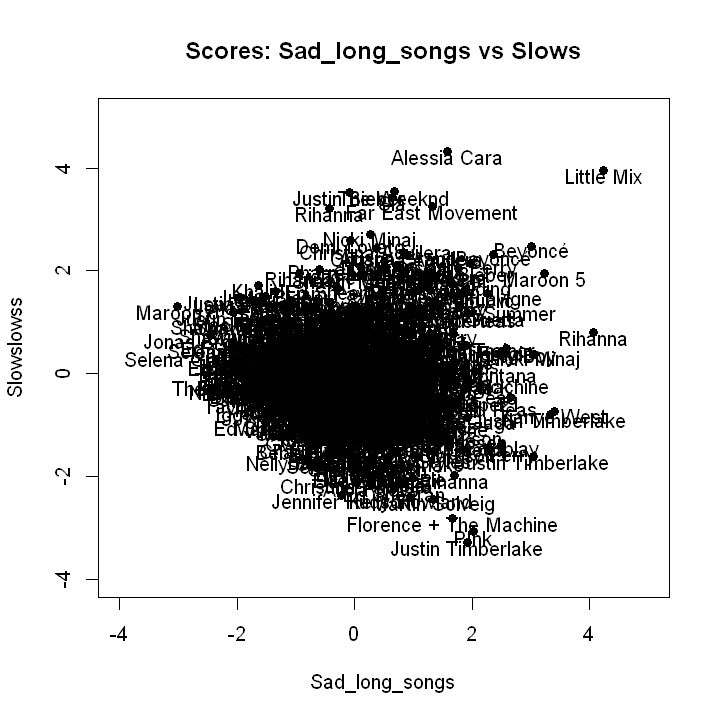

In [37]:
# Depict the scatterplot of PC2 vs PC4
plot(bd$sad_long_songs, bd$slows, pch = 19, xlim = c(-4,5),
ylim = c(-4,5), xlab = "Sad_long_songs", ylab = "Slowslowss", main = "Scores: Sad_long_songs vs Slows")
text(bd$sad_long_songs, bd$slows - 0.1, bd[,2])
options(repr.plot.width = 10, repr.plot.height = 10, message = FALSE)

In [38]:
# Calcular a correlação : Energy vs Sad_long_songs
cor(bd$nrgy,bd$sad_long_songs)

[1] 0.3073032

### Simplificar a variável profile "genre"

Com vista a facilitar a visualização das diferentes categorias da variável genre, recorreu-se a um código presente na página do Kaggle. Este separa a variável top.genre em 2 novas variáveis ("variable","genre"), e volta a reagrupar os géneros em grupos mais gerais.

In [39]:
bd <- bd %>% separate(("top.genre"), c("variable","genre"), extra='merge')

Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 97 rows [44, 60, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 96, 97, 98, 104, 105, ...]."

In [40]:
other <-c("complextro","downtempo","brostep","electro","electronic","escape","folk-pop","hollywood","house","irish","permanent","neo","metropolis","tropical")
bd$genre[bd$variable %in% other]  <- 'Other'
bd$genre[bd$variable =='hip']  <- 'hip hop'
bd$genre[bd$variable =='latin']  <- 'latin'
bd$genre[bd$variable =='boy']  <- 'pop'
bd$genre[bd$variable =='french']  <- 'pop'
bd$genre[bd$variable =='electropop']  <- 'pop'
bd$genre[bd$variable =='pop']  <- 'pop'
bd$genre[bd$genre=='contemporary r&b'] <-'r&b'
bd$genre[bd$genre=='room'] <-'Other'
bd$genre[bd$variable =='dance']  <- 'dance pop'
bd$genre[bd$genre=='dance'] <-'dance pop'
table(bd$genre)


  country dance pop       edm   hip hop     indie     latin     Other       pop 
        1       333         2        20         1         5        46       166 
      r&b       rap      rock      soul 
       10         1         1        10 

In [41]:
miss <- colSums(is.na(bd))
print(miss[miss>0])

genre 
    6 


In [42]:
bd[is.na(bd)] <- 'Other'

In [43]:
bd$genre <- as.factor(bd$genre)
str(bd)

'data.frame':	602 obs. of  22 variables:
 $ title         : Factor w/ 584 levels "#Beautiful","#SELFIE",..: 333 426 414 555 234 438 405 420 198 21 ...
 $ artist        : Factor w/ 184 levels "3OH!3","5 Seconds of Summer",..: 1 2 3 4 4 5 5 5 5 5 ...
 $ variable      : chr  "dance" "boy" "neo" "australian" ...
 $ genre         : Factor w/ 12 levels "country","dance pop",..: 2 8 7 8 8 12 12 12 12 12 ...
 $ year          : Factor w/ 10 levels "2010","2011",..: 1 5 5 1 1 2 2 3 6 7 ...
 $ bpm           : int  138 160 138 186 131 135 105 108 158 142 ...
 $ nrgy          : int  89 95 15 68 91 33 76 68 45 28 ...
 $ dnce          : int  68 49 45 44 65 56 73 61 48 59 ...
 $ dB            : int  -4 -4 -9 -5 -4 -8 -5 -4 -6 -5 ...
 $ live          : int  36 33 9 6 37 10 5 13 9 15 ...
 $ val           : int  83 44 9 45 79 28 52 47 29 34 ...
 $ dur           : int  192 202 229 227 228 285 228 242 295 272 ...
 $ acous         : int  1 0 87 1 1 89 13 0 34 88 ...
 $ spch          : int  8 13 3 5 11 3 3 3

## Clustering

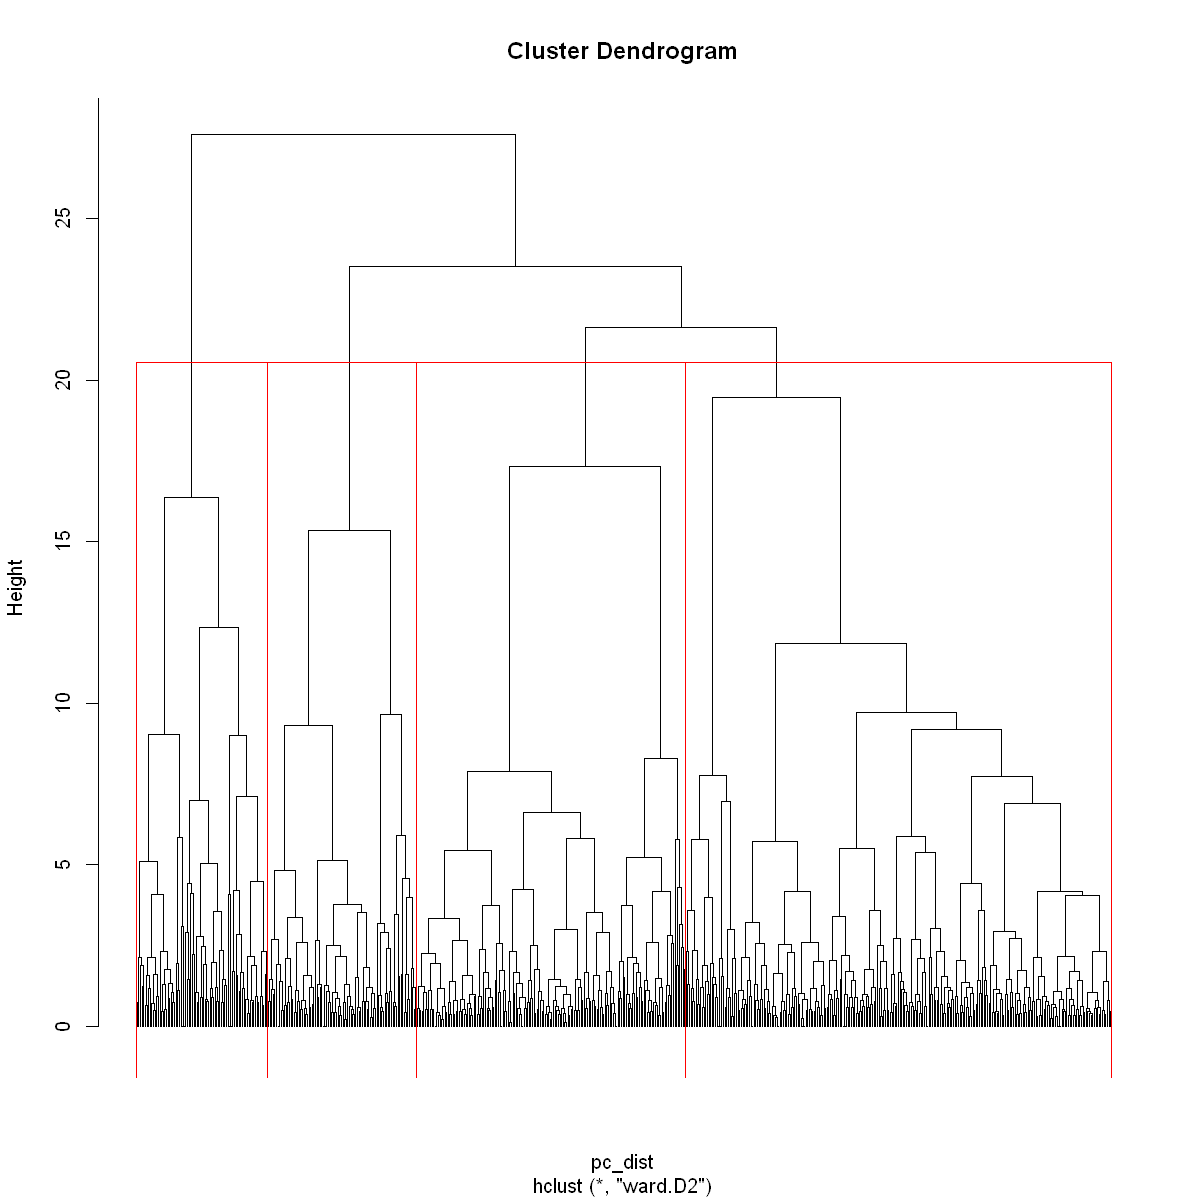

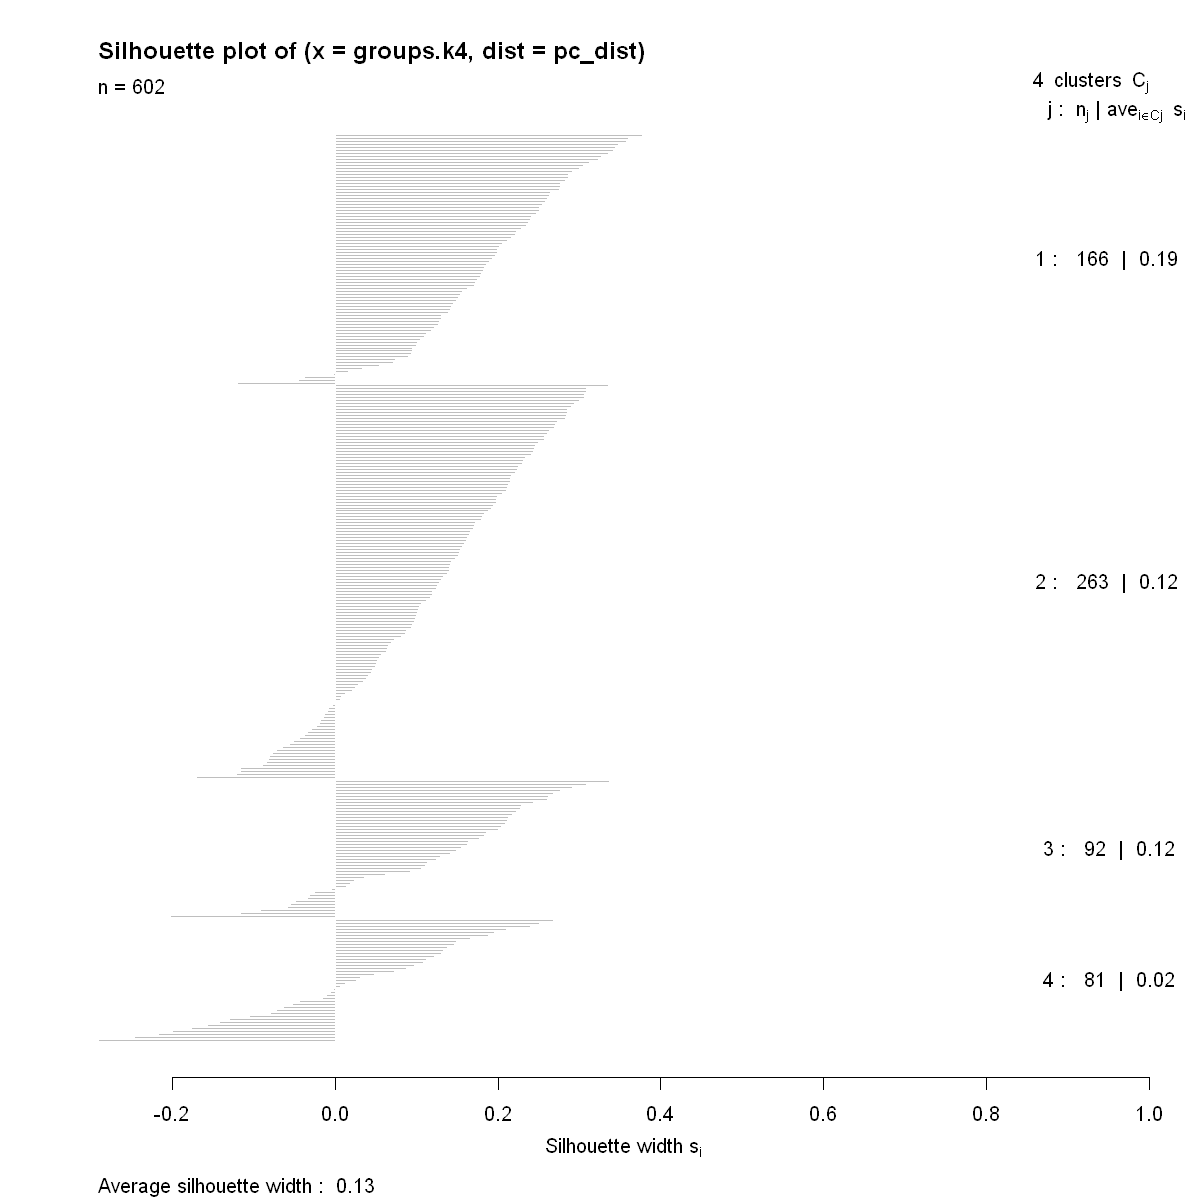

In [44]:
# Clustering

#Hierarchical cluster
pc_dist <- dist(bd[,18:22])
hclust  <- hclust(pc_dist, method='ward.D2')
plot(hclust, hang=-1, labels=FALSE)

# Cut the dendrogram
groups.k4 <- cutree(hclust, k=4) # cut tree into 4 clusters
rect.hclust(hclust, k=4, border="red") 

#Silhouette
plot(silhouette(groups.k4, pc_dist))

Com base no dendograma decidiu-se utilizar 4 clusters.
A partir da silhueta é possível verificar um valor médio de 0.13, apresentando uma estrutura inadmissível.

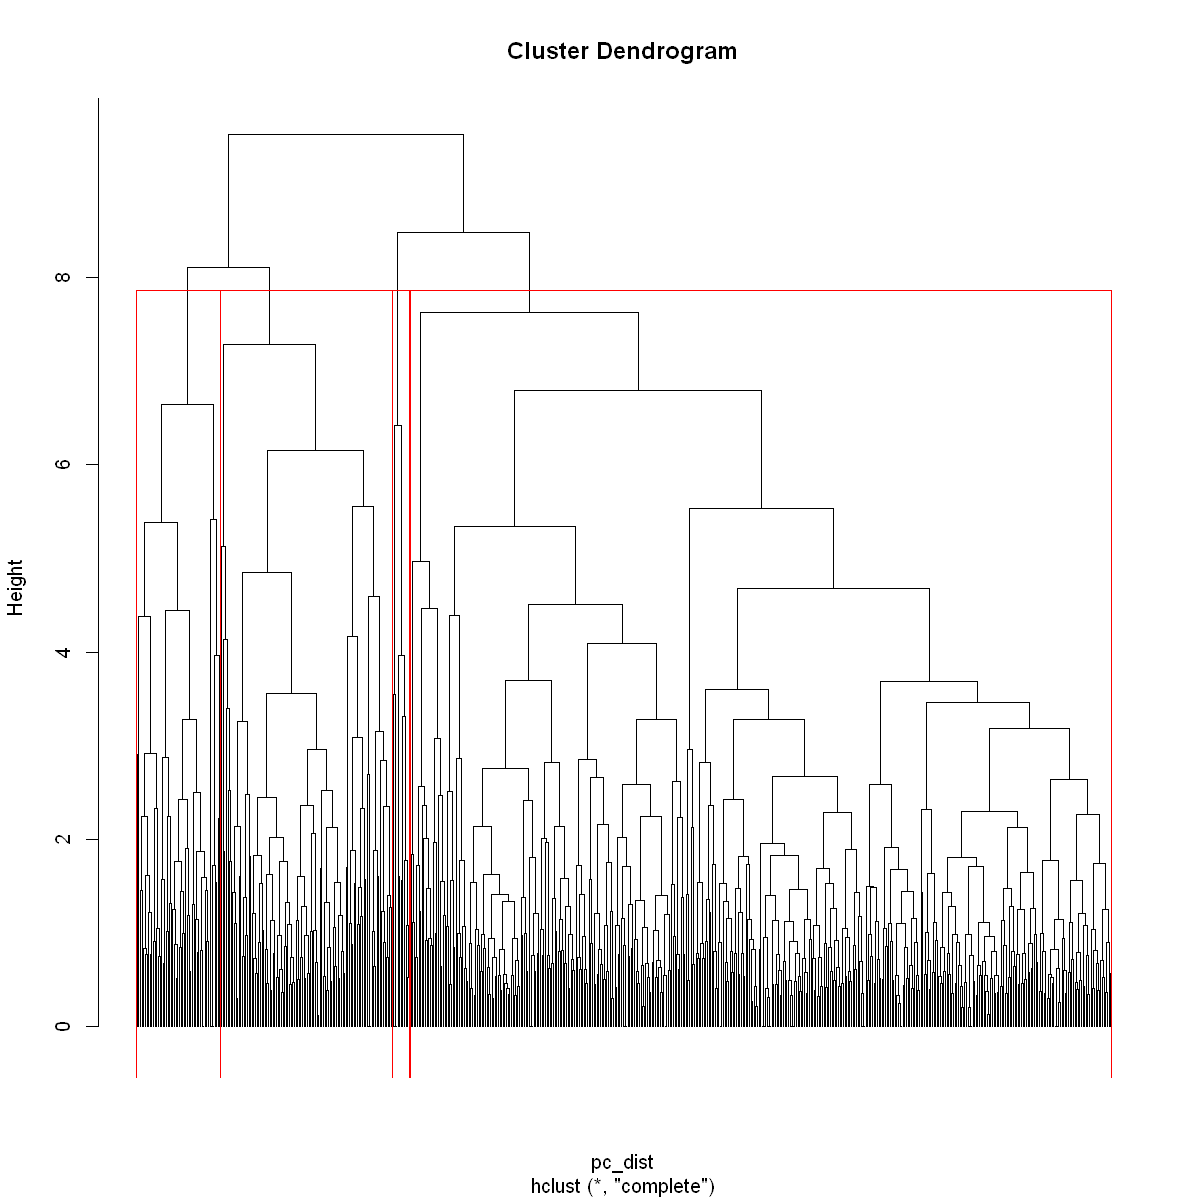

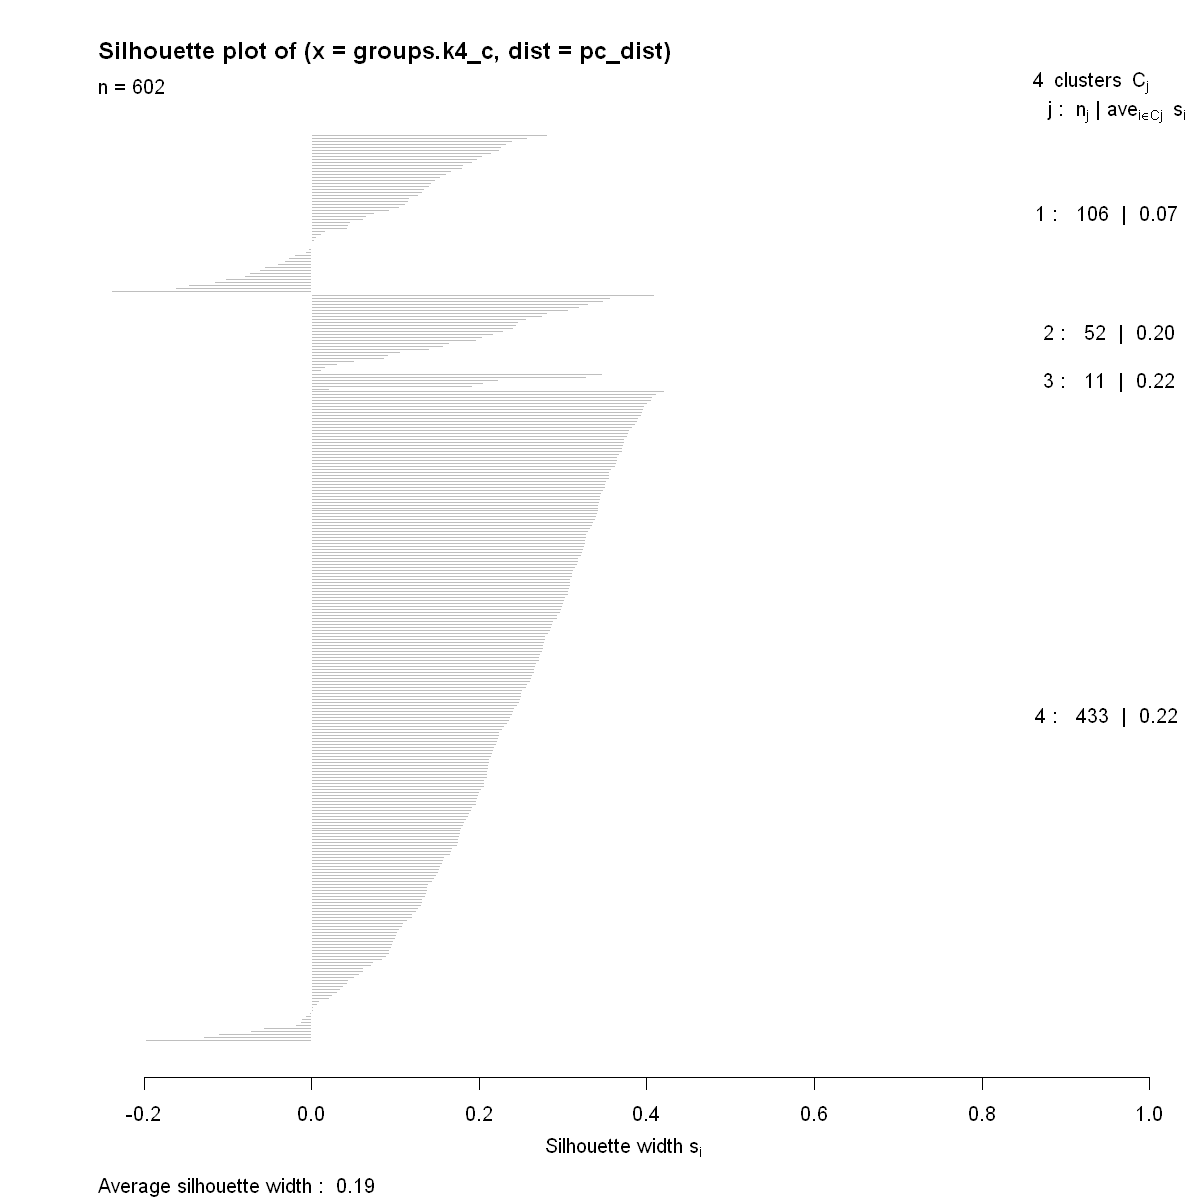

In [45]:
#Hierarchical cluster method complete
pc_dist <- dist(bd[,18:22]) # compute distance (no need of scaling)
hclust  <- hclust(pc_dist,method='complete')
plot(hclust, hang=-1, labels=FALSE)

# Cut the dendrogram
groups.k4_c <- cutree(hclust, k=4) # cut tree into 4 clusters
rect.hclust(hclust, k=4, border="red") 

#Silhouette
plot(silhouette(groups.k4_c, pc_dist))

In [46]:
#crosstab
table(groups.k4,groups.k4_c)

         groups.k4_c
groups.k4   1   2   3   4
        1  74   0   0  92
        2   7  35   0 221
        3   0   0   8  84
        4  25  17   3  36

Verifica-se que os 2 métodos apresentam clusters diferentes visto que na matriz acima existem valores fora da diagonal principal.

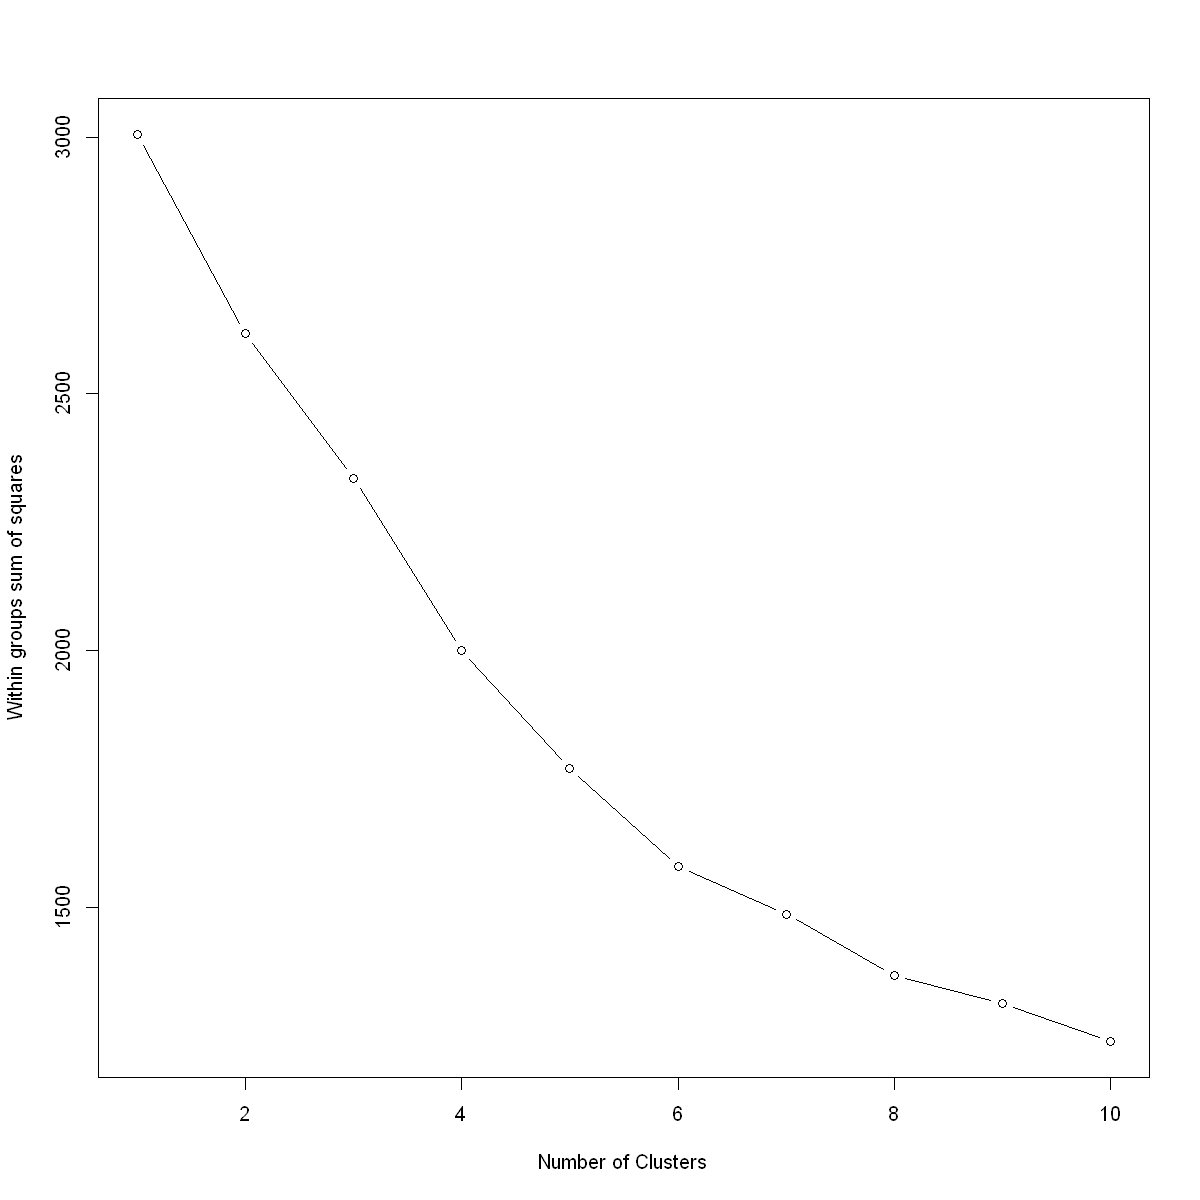

In [47]:
# K-Means: number of clusters
wssplot <- function(xx, nc=15, seed=1234){
  wss <- (nrow(xx)-1)*sum(apply(xx,2,var))
  for (i in 2:nc){
    set.seed(seed)
    wss[i] <- sum(kmeans(xx, centers=i)$withinss)}
  plot(1:nc, wss, type="b", xlab="Number of Clusters",
       ylab="Within groups sum of squares")}
wssplot(bd[,18:22], nc=10)

In [48]:
#K-means cluster com K=4
kmeans.k4 <- kmeans(bd[,18:22], 4, nstart=100) 
bd = bd %>% mutate(cluster = kmeans.k4$cluster)

#crosstab
table(groups.k4, bd$cluster)

         
groups.k4   1   2   3   4
        1   1 152   6   7
        2  21 163  16  63
        3  69  23   0   0
        4   0   4  63  14

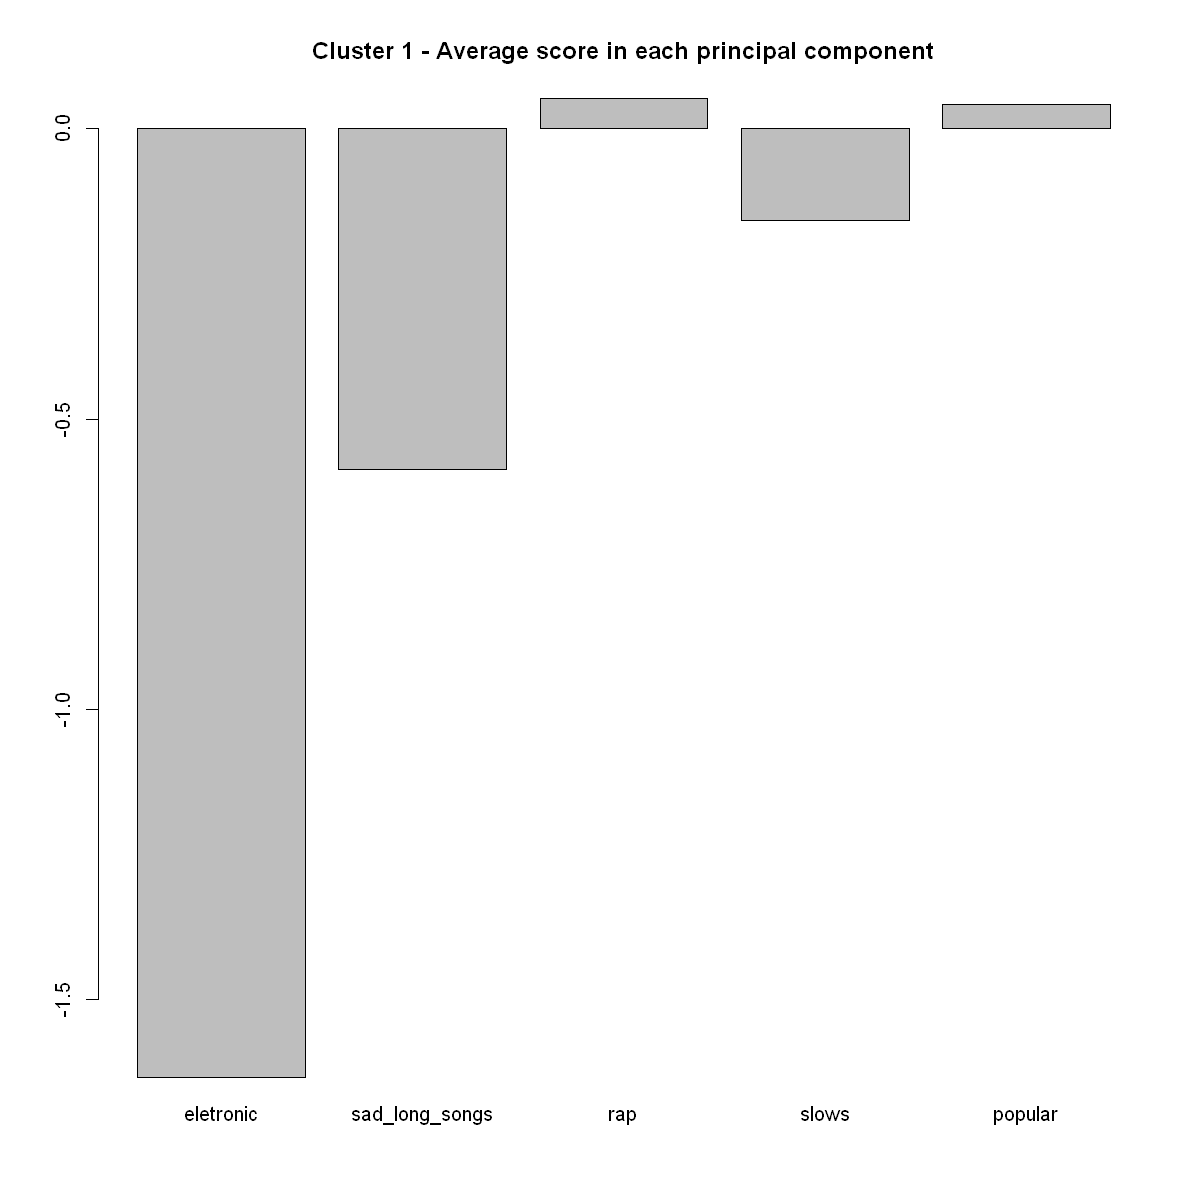

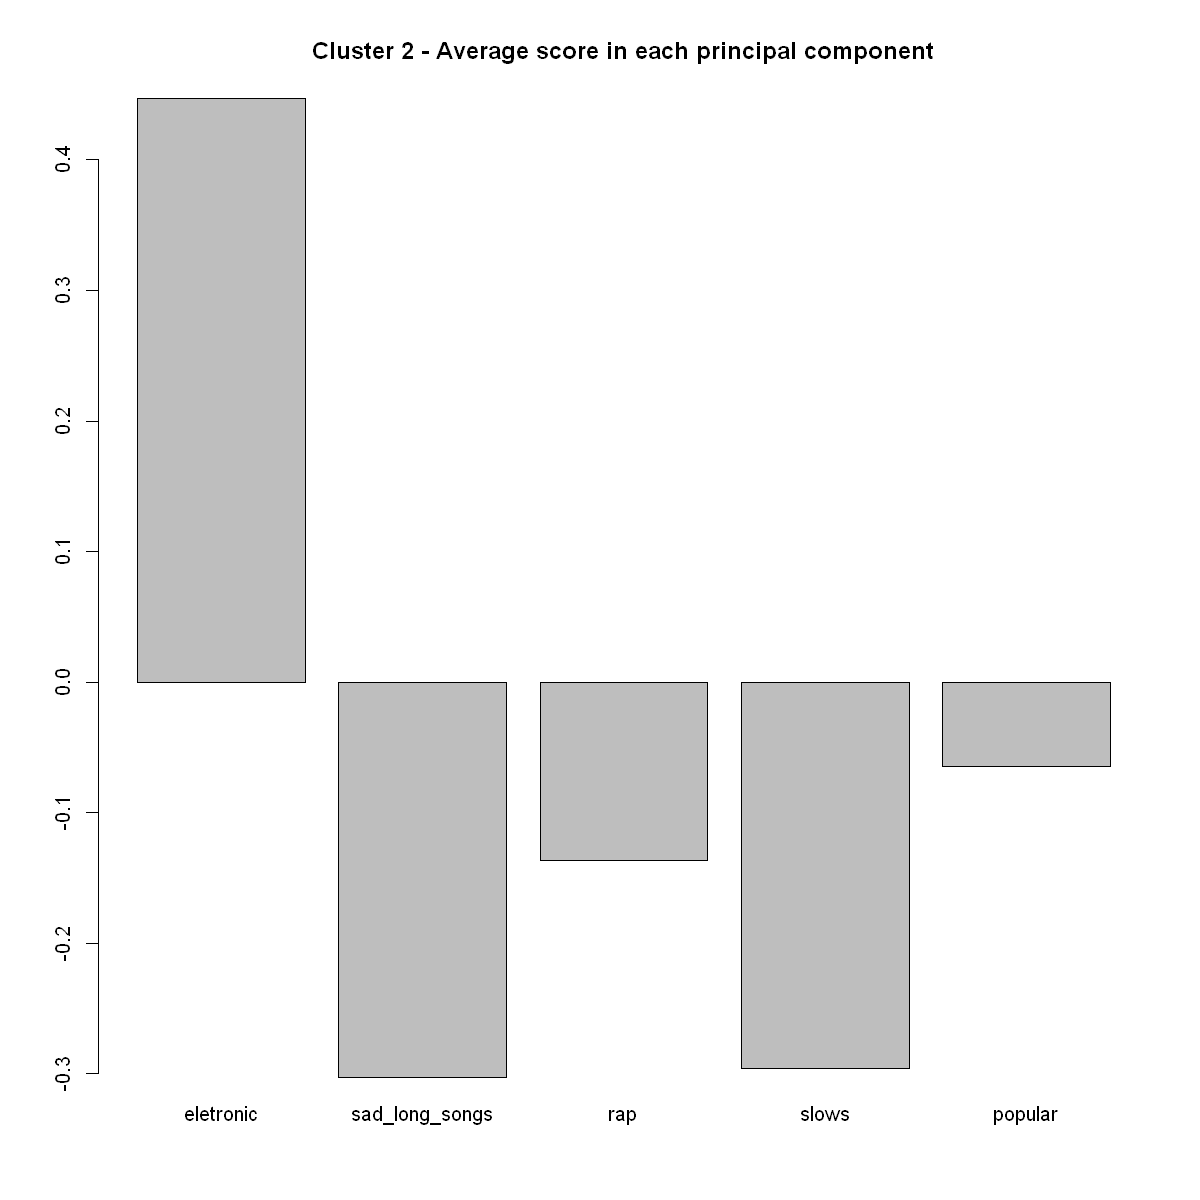

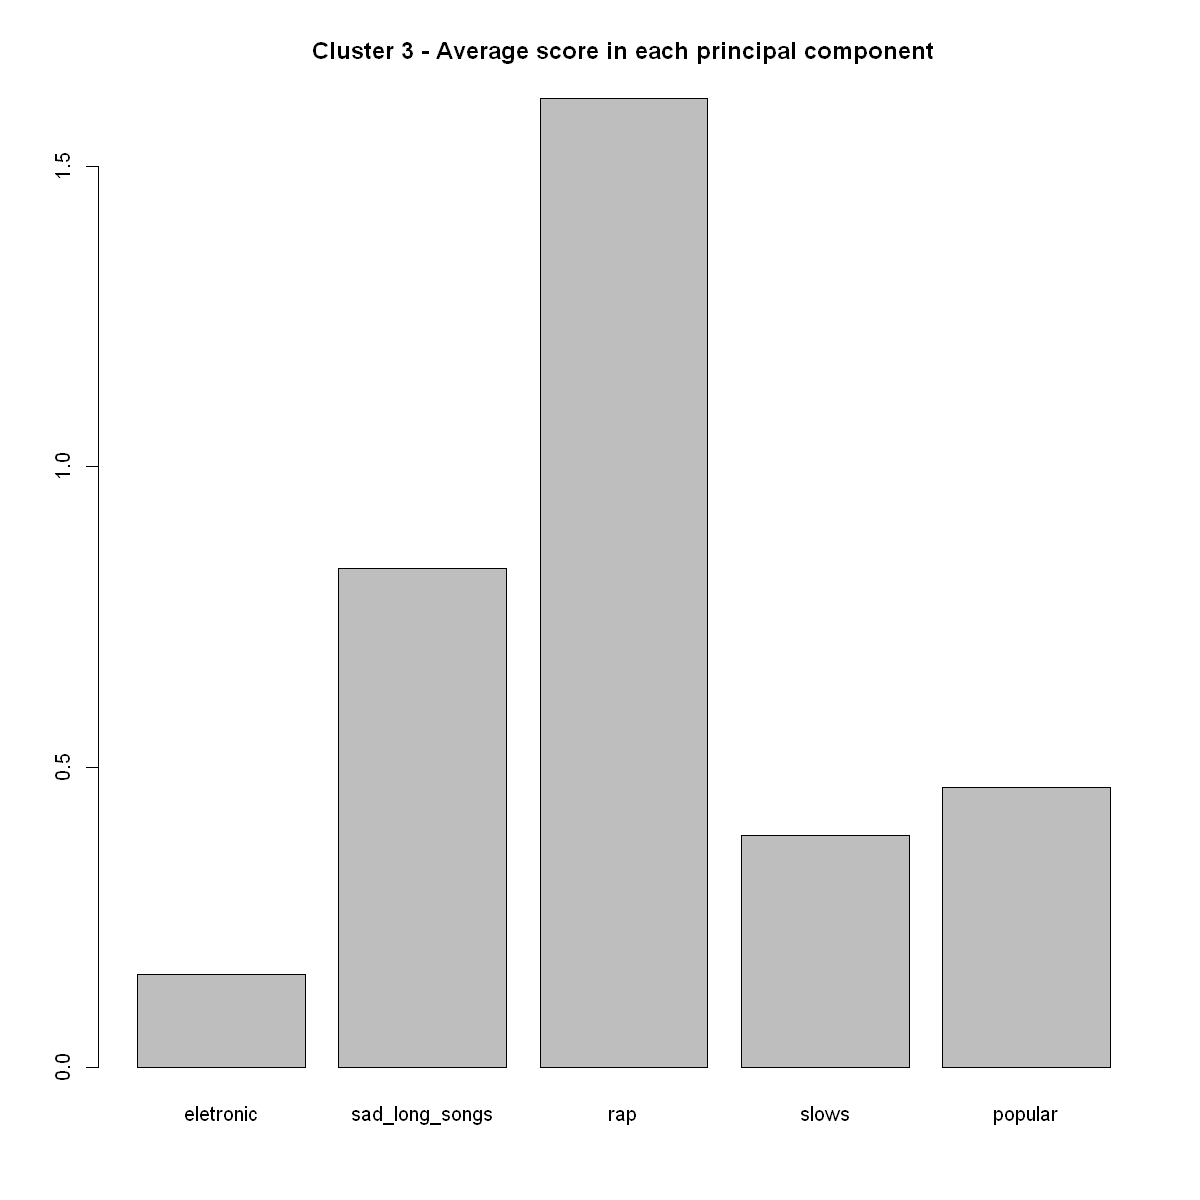

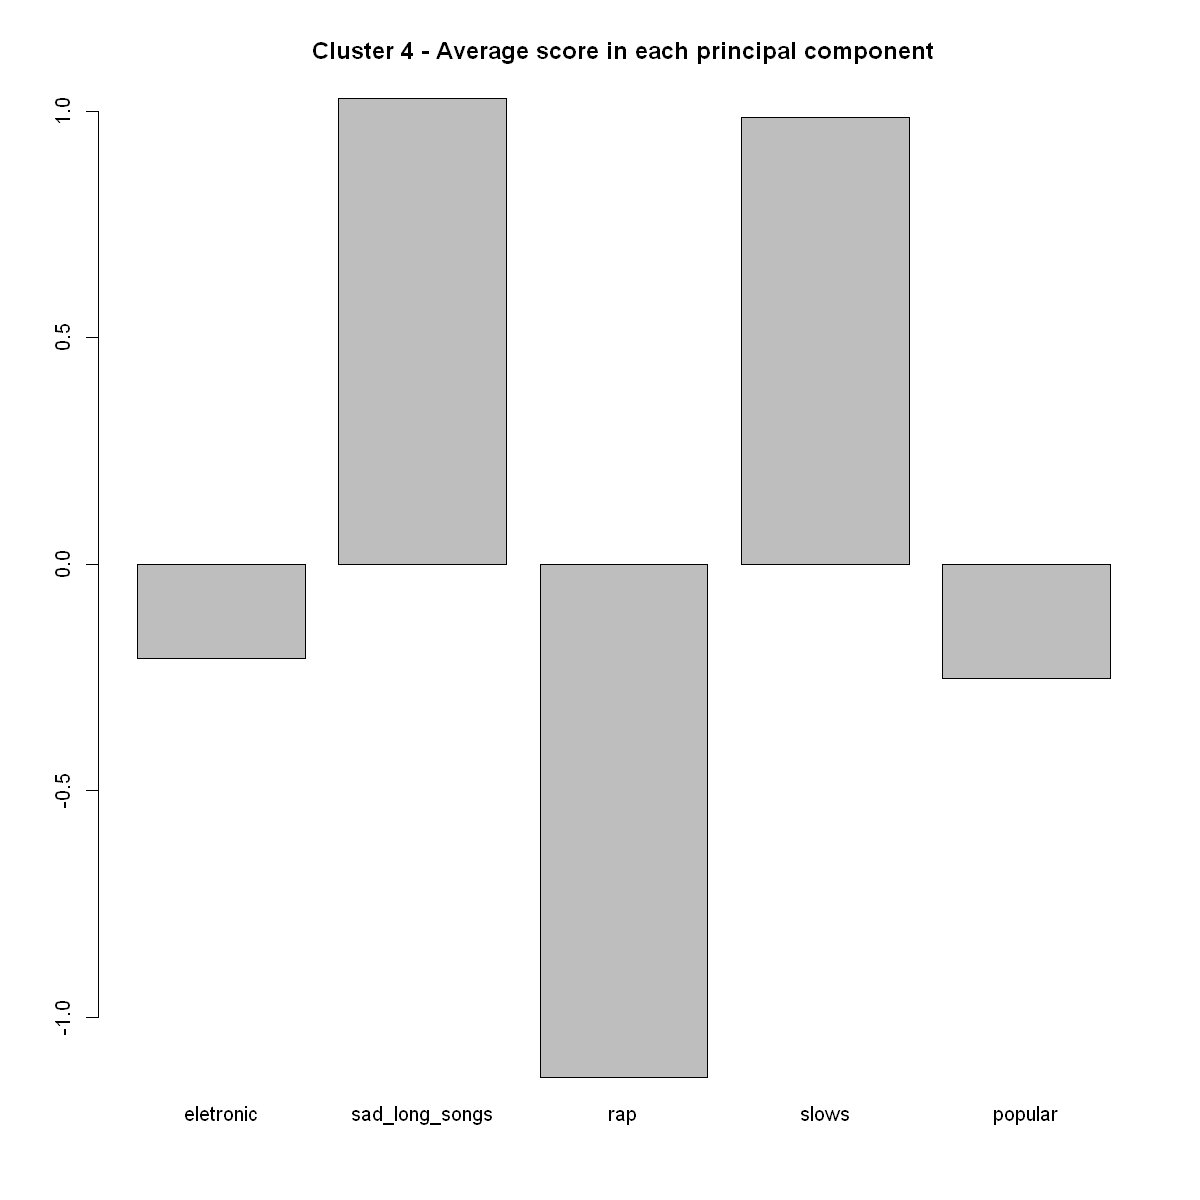

In [49]:
#Barplot of average score in each principal component within each cluster
barplot(colMeans(subset(bd,cluster==1)[,18:22]),main= "Cluster 1 - Average score in each principal component")
barplot(colMeans(subset(bd,cluster==2)[,18:22]),main= "Cluster 2 - Average score in each principal component")
barplot(colMeans(subset(bd,cluster==3)[,18:22]),main= "Cluster 3 - Average score in each principal component")
barplot(colMeans(subset(bd,cluster==4)[,18:22]),main= "Cluster 4 - Average score in each principal component")

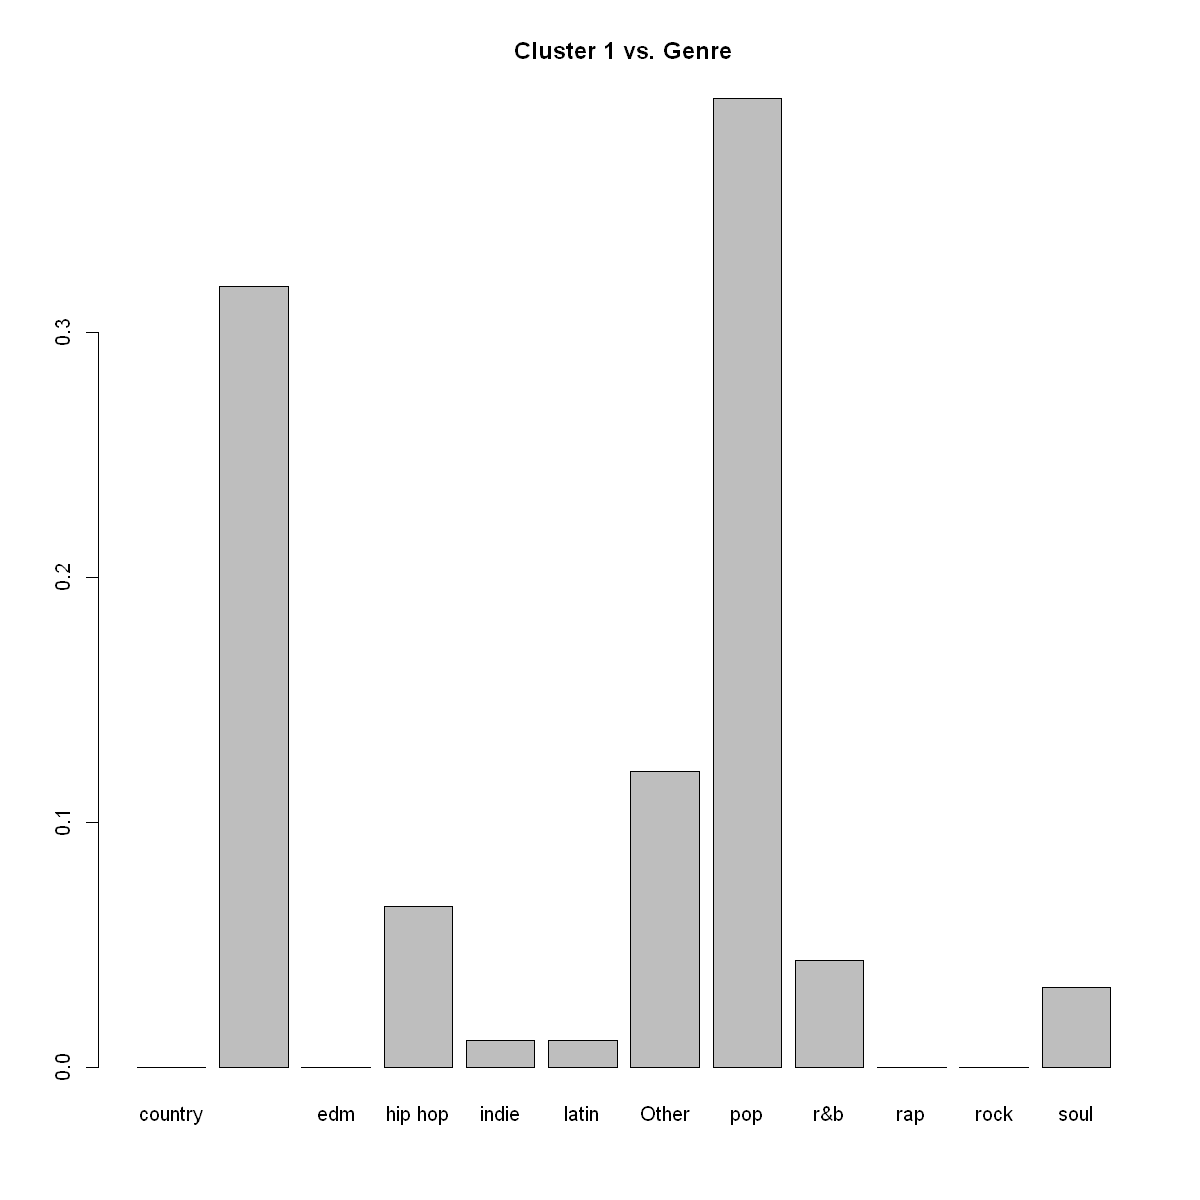

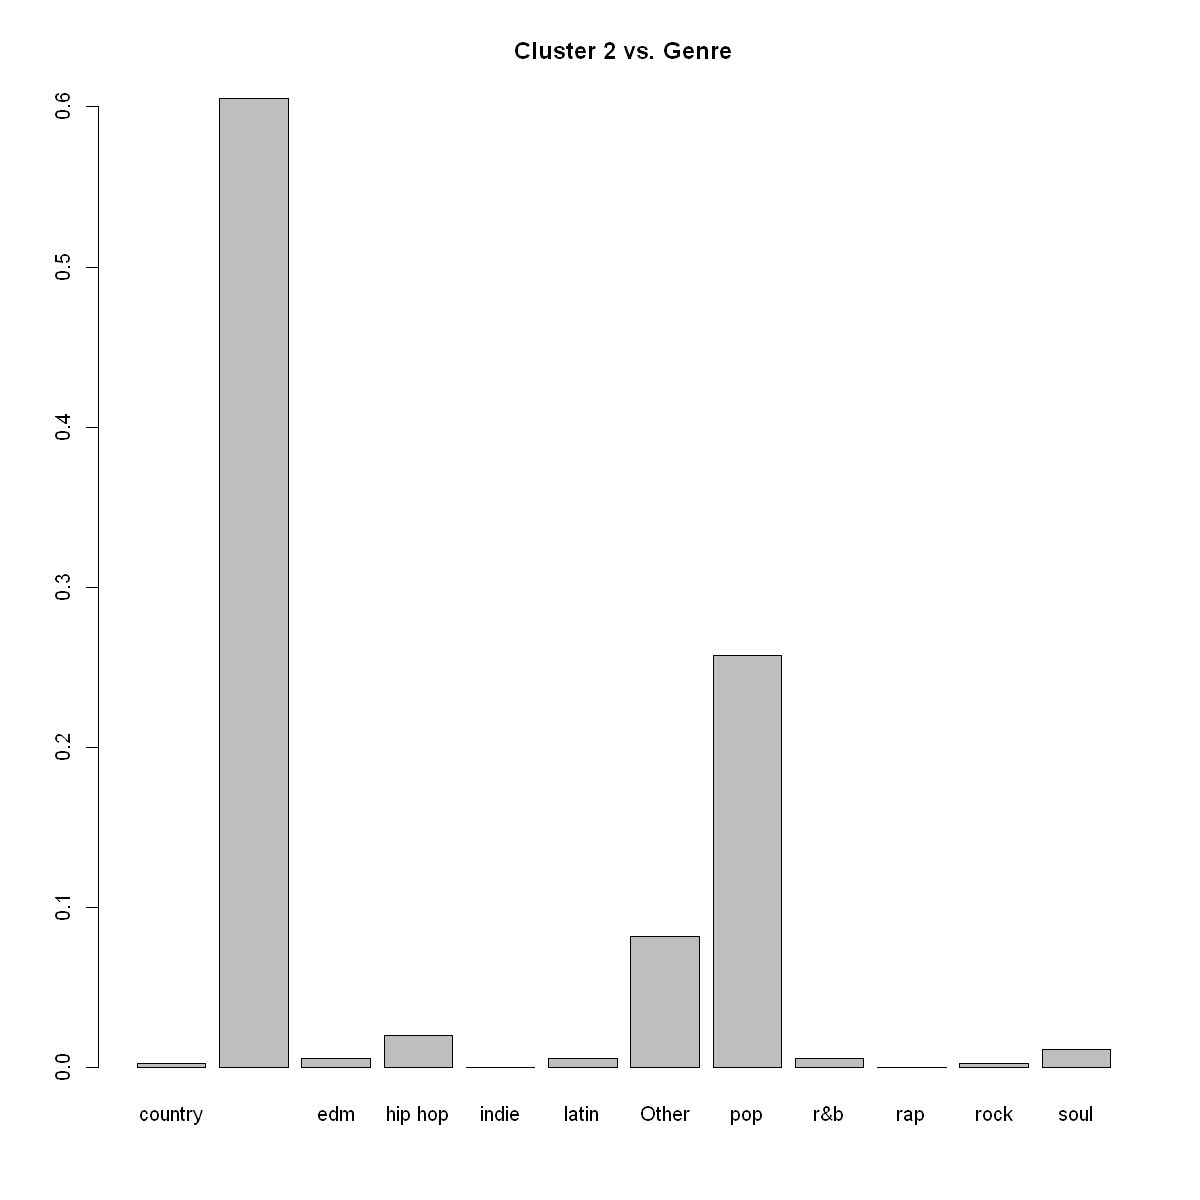

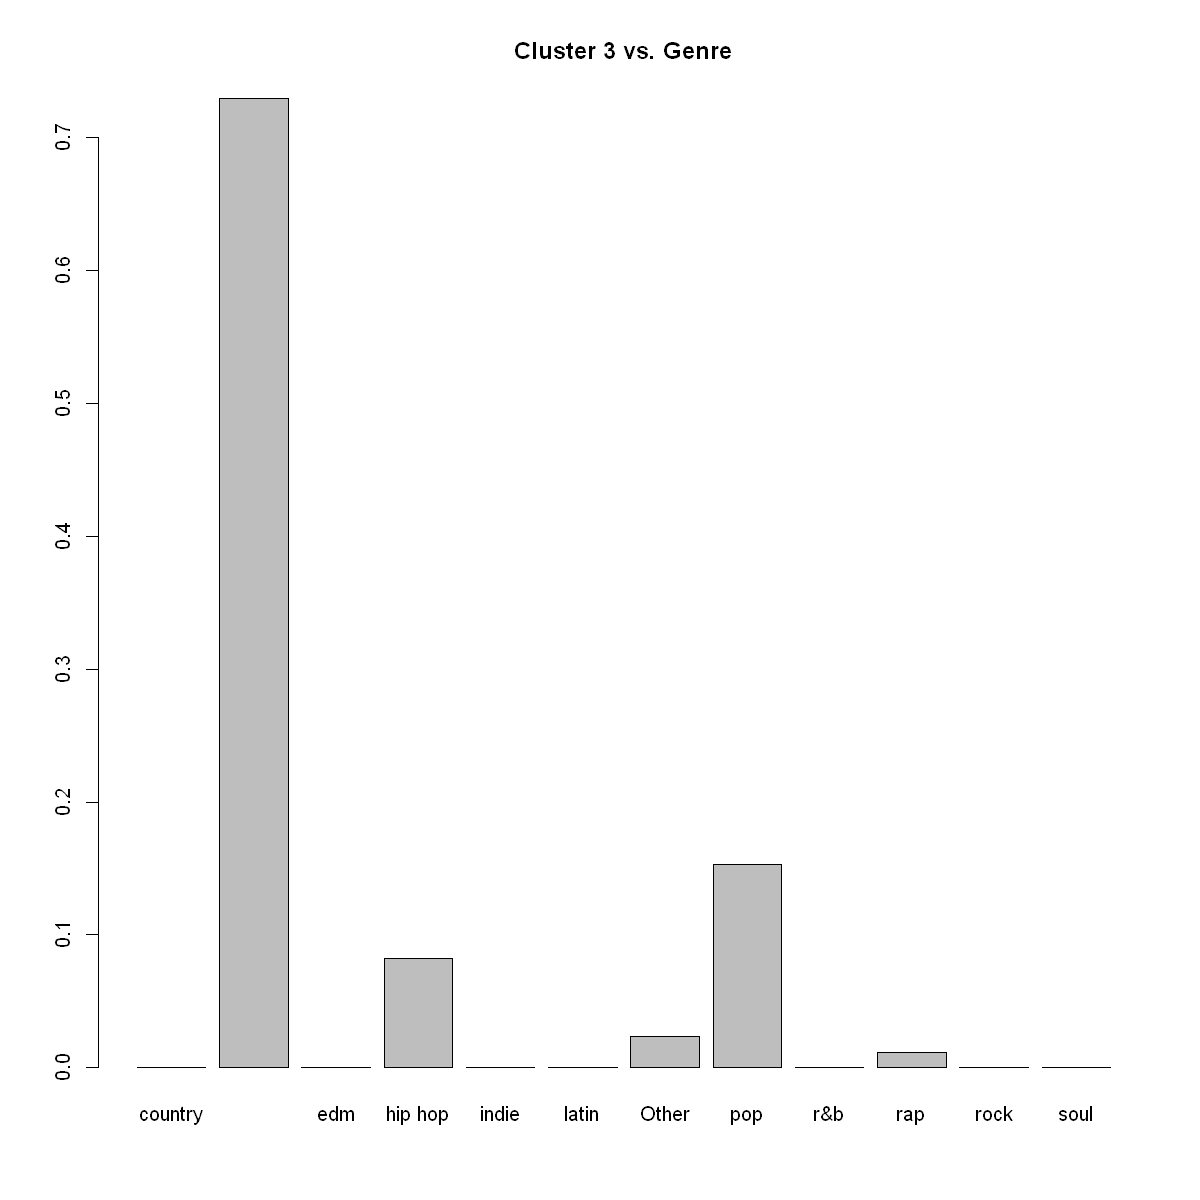

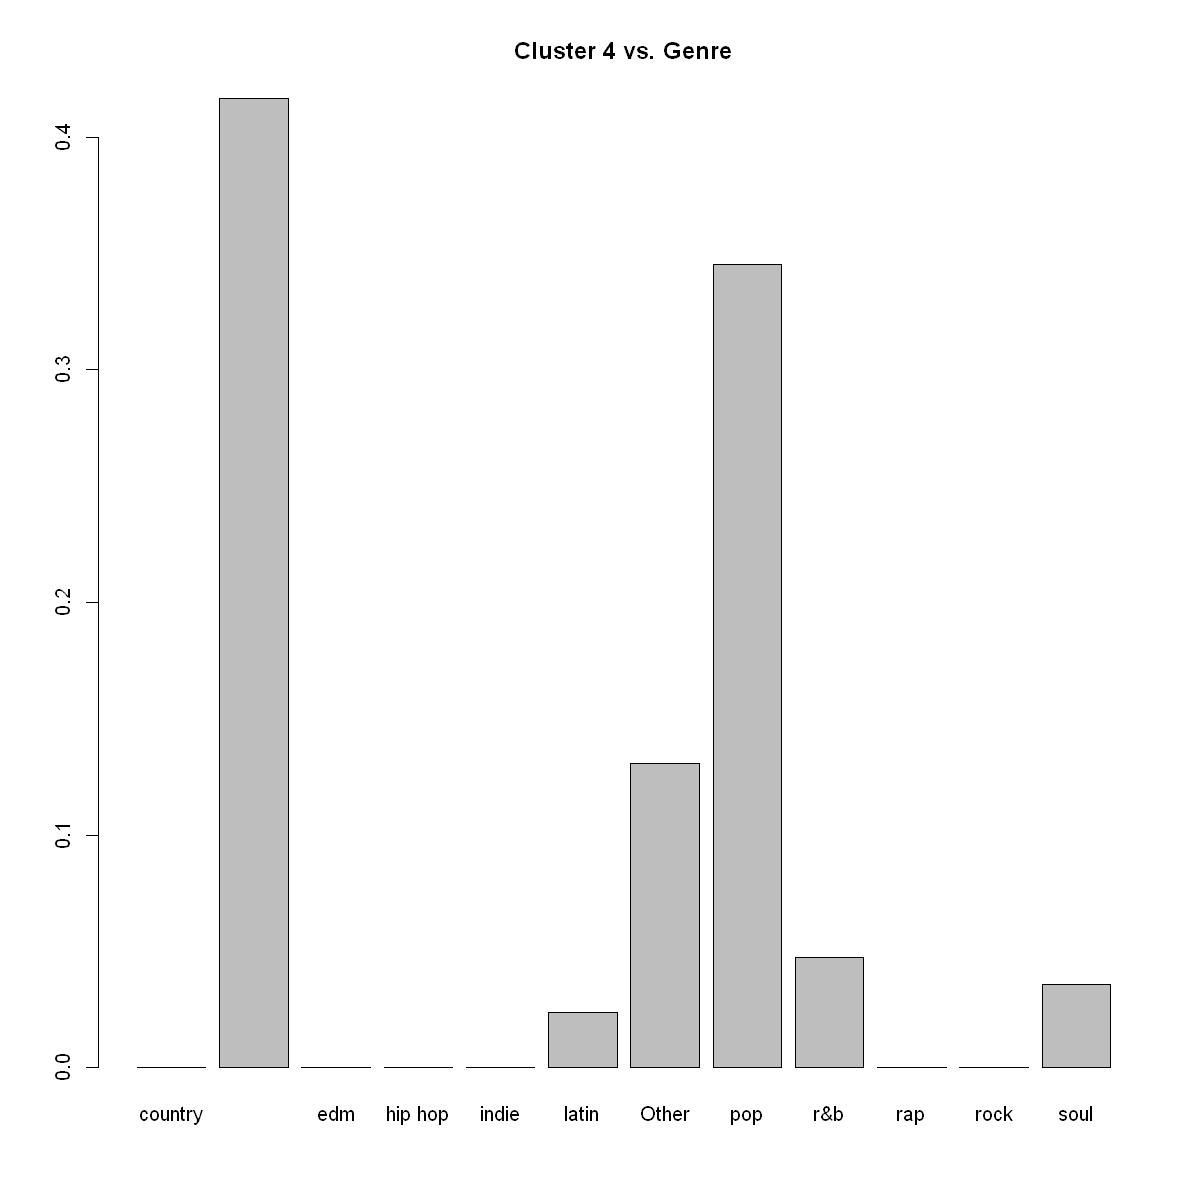

In [50]:
#Barplot of genre distribution within each cluster
barplot(prop.table(table(subset(bd,cluster==1)[,4])),main= "Cluster 1 vs. Genre")
barplot(prop.table(table(subset(bd,cluster==2)[,4])),main= "Cluster 2 vs. Genre")
barplot(prop.table(table(subset(bd,cluster==3)[,4])),main= "Cluster 3 vs. Genre")
barplot(prop.table(table(subset(bd,cluster==4)[,4])),main= "Cluster 4 vs. Genre")

In [51]:
# Proporções da variável genre para cada um dos clusters 
prop.table(table(subset(bd,cluster==1)[,4]))
prop.table(table(subset(bd,cluster==2)[,4]))
prop.table(table(subset(bd,cluster==3)[,4]))
prop.table(table(subset(bd,cluster==4)[,4]))


   country  dance pop        edm    hip hop      indie      latin      Other 
0.00000000 0.31868132 0.00000000 0.06593407 0.01098901 0.01098901 0.12087912 
       pop        r&b        rap       rock       soul 
0.39560440 0.04395604 0.00000000 0.00000000 0.03296703 


    country   dance pop         edm     hip hop       indie       latin 
0.002923977 0.605263158 0.005847953 0.020467836 0.000000000 0.005847953 
      Other         pop         r&b         rap        rock        soul 
0.081871345 0.257309942 0.005847953 0.000000000 0.002923977 0.011695906 


   country  dance pop        edm    hip hop      indie      latin      Other 
0.00000000 0.72941176 0.00000000 0.08235294 0.00000000 0.00000000 0.02352941 
       pop        r&b        rap       rock       soul 
0.15294118 0.00000000 0.01176471 0.00000000 0.00000000 


   country  dance pop        edm    hip hop      indie      latin      Other 
0.00000000 0.41666667 0.00000000 0.00000000 0.00000000 0.02380952 0.13095238 
       pop        r&b        rap       rock       soul 
0.34523810 0.04761905 0.00000000 0.00000000 0.03571429 

In [52]:
#crosstab
table(bd[,4],bd$cluster)

           
              1   2   3   4
  country     0   1   0   0
  dance pop  29 207  62  35
  edm         0   2   0   0
  hip hop     6   7   7   0
  indie       1   0   0   0
  latin       1   2   0   2
  Other      11  28   2  11
  pop        36  88  13  29
  r&b         4   2   0   4
  rap         0   0   1   0
  rock        0   1   0   0
  soul        3   4   0   3

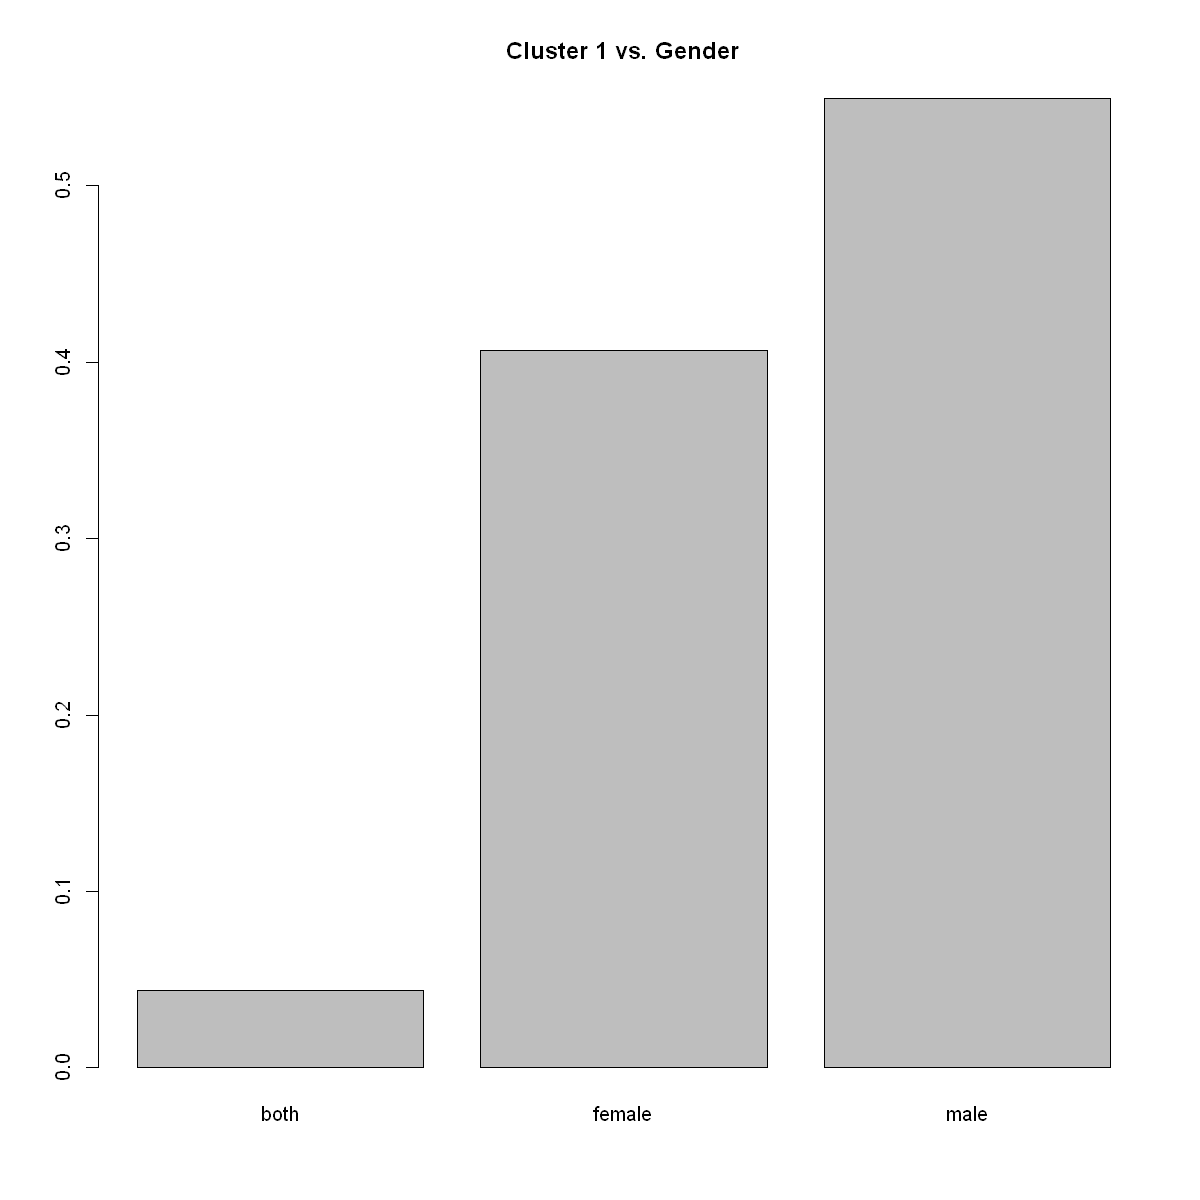

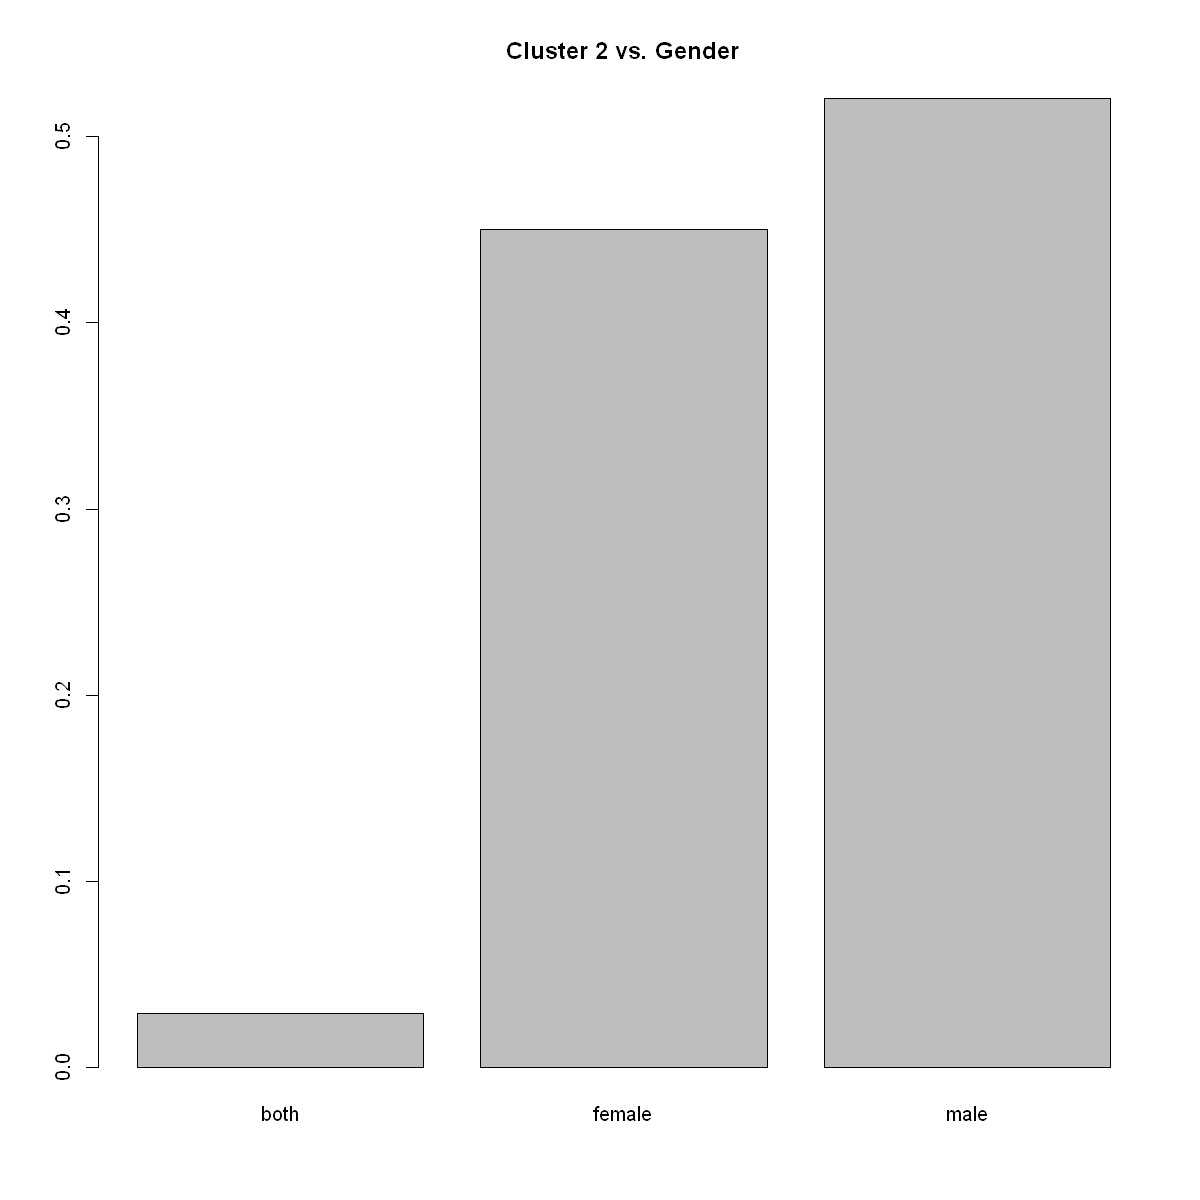

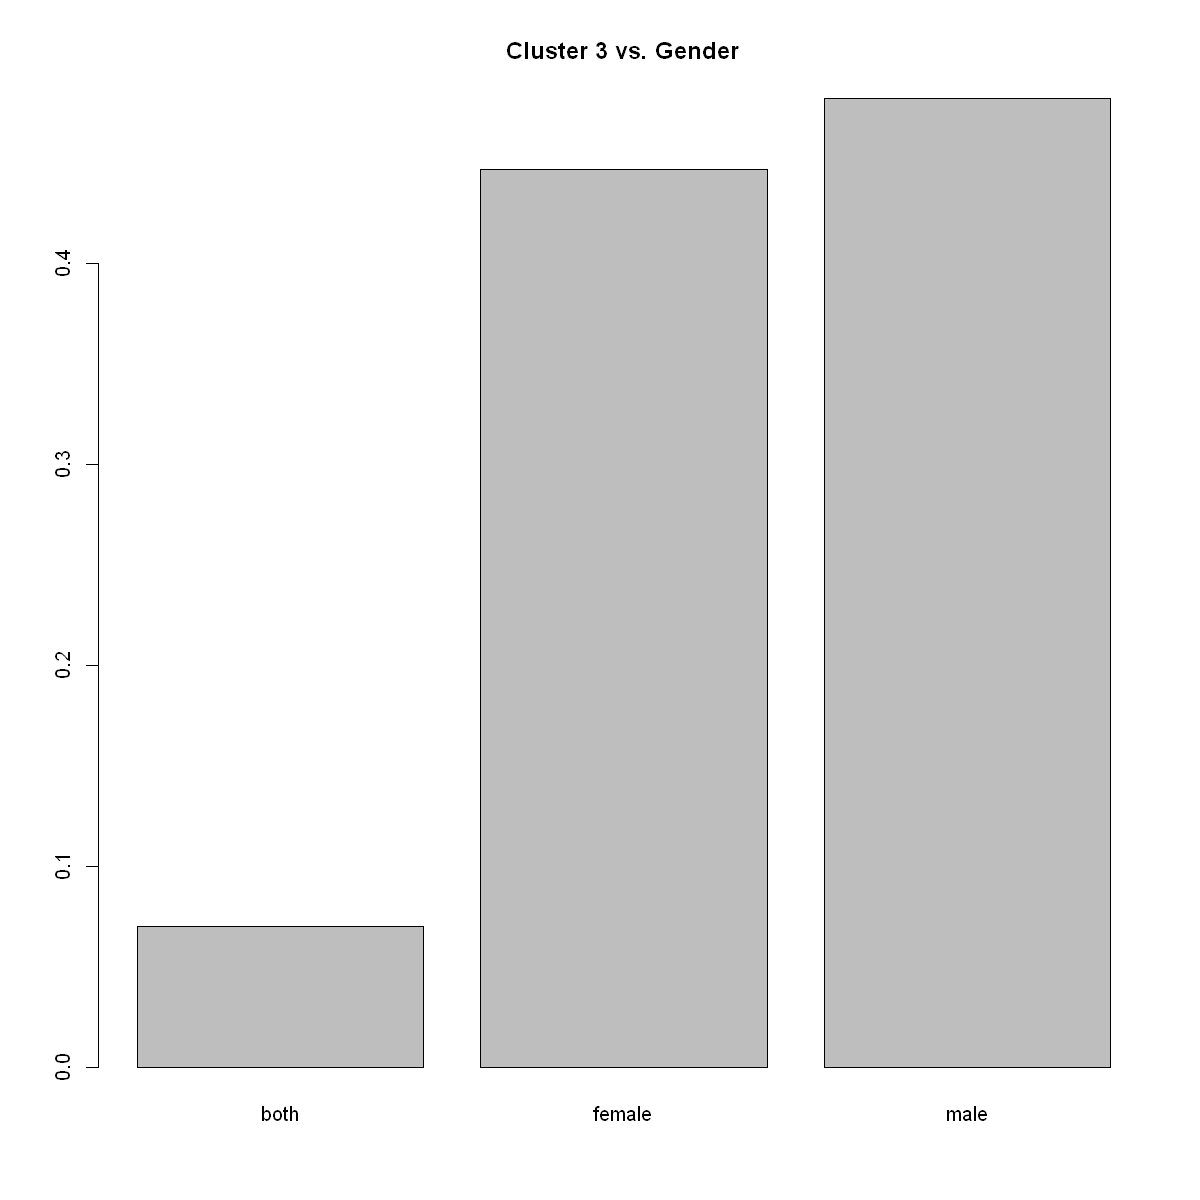

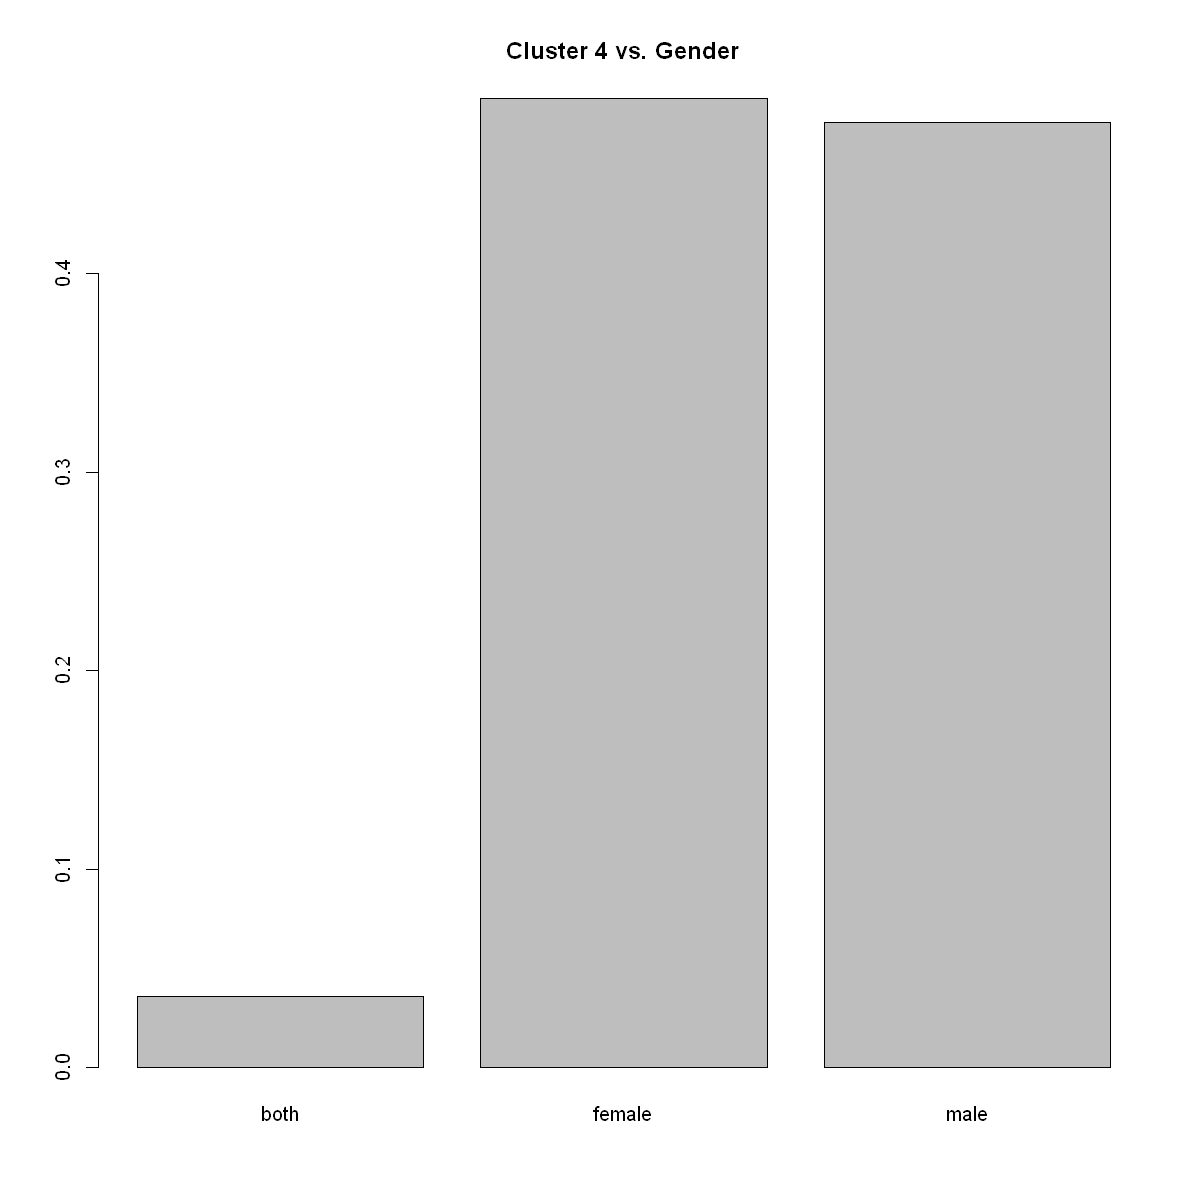

In [53]:
#Barplot of gender distribution within each cluster
barplot(prop.table(table(subset(bd,cluster==1)[,16])),main= "Cluster 1 vs. Gender")
barplot(prop.table(table(subset(bd,cluster==2)[,16])),main= "Cluster 2 vs. Gender")
barplot(prop.table(table(subset(bd,cluster==3)[,16])),main= "Cluster 3 vs. Gender")
barplot(prop.table(table(subset(bd,cluster==4)[,16])),main= "Cluster 4 vs. Gender")

In [54]:
# Proporções da variável gender para cada um dos clusters 
prop.table(table(subset(bd,cluster==1)[,17]))
prop.table(table(subset(bd,cluster==2)[,17]))
prop.table(table(subset(bd,cluster==3)[,17]))
prop.table(table(subset(bd,cluster==4)[,17]))


      band        duo       solo 
0.12087912 0.07692308 0.80219780 


      band        duo       solo 
0.17836257 0.03216374 0.78947368 


      band        duo       solo 
0.10588235 0.07058824 0.82352941 


      band        duo       solo 
0.14285714 0.02380952 0.83333333 

In [55]:
#crosstab
table(bd[,16],bd$cluster)

        
           1   2   3   4
  both     4  10   6   3
  female  37 154  38  41
  male    50 178  41  40

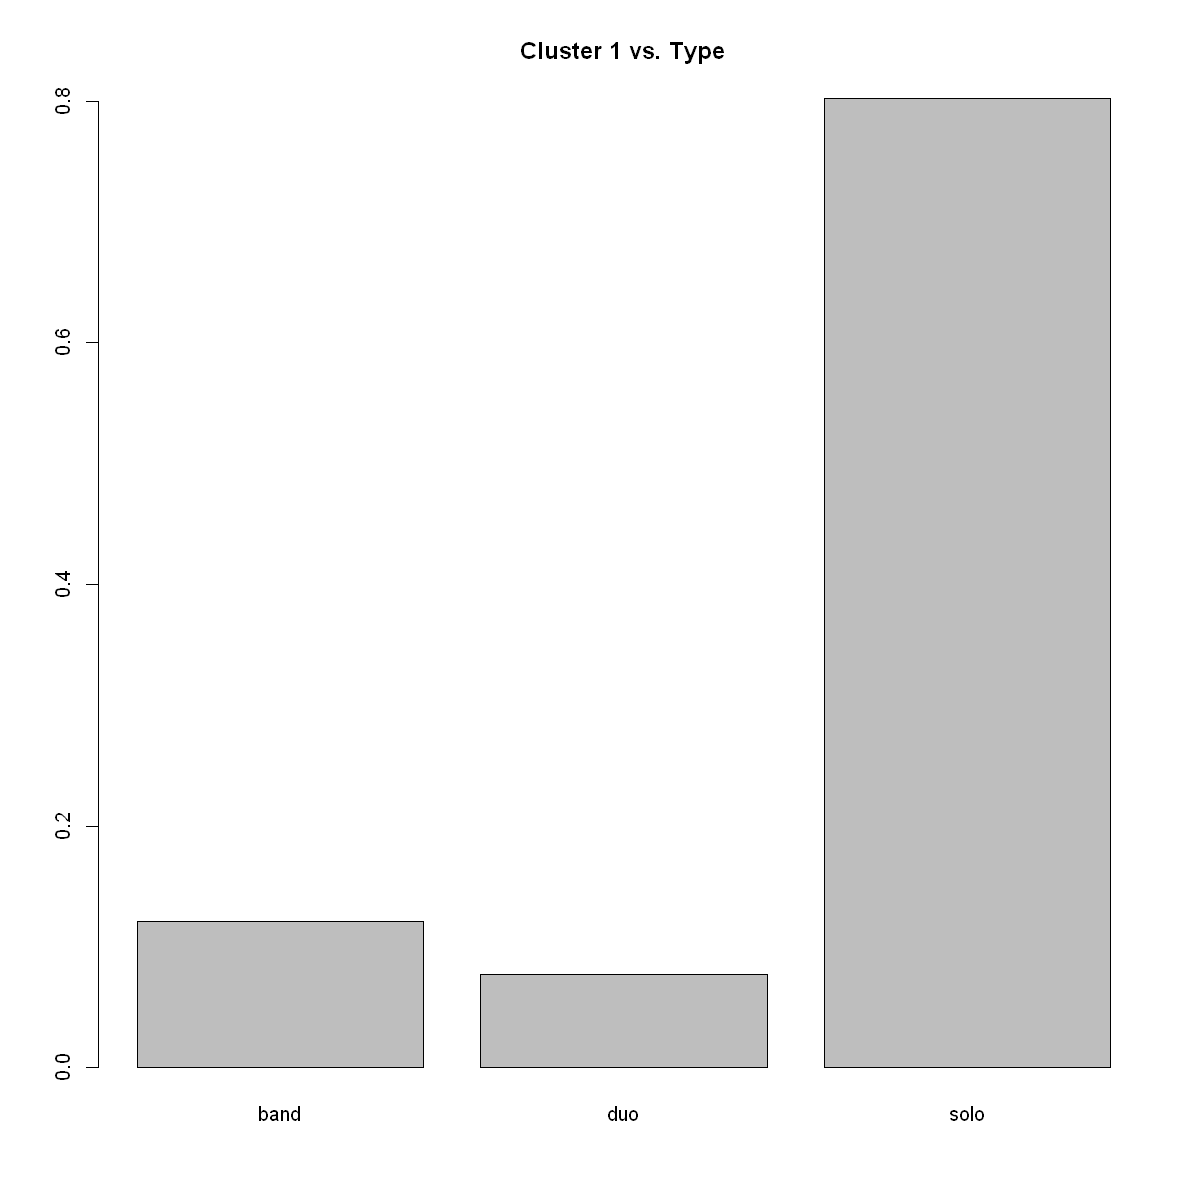

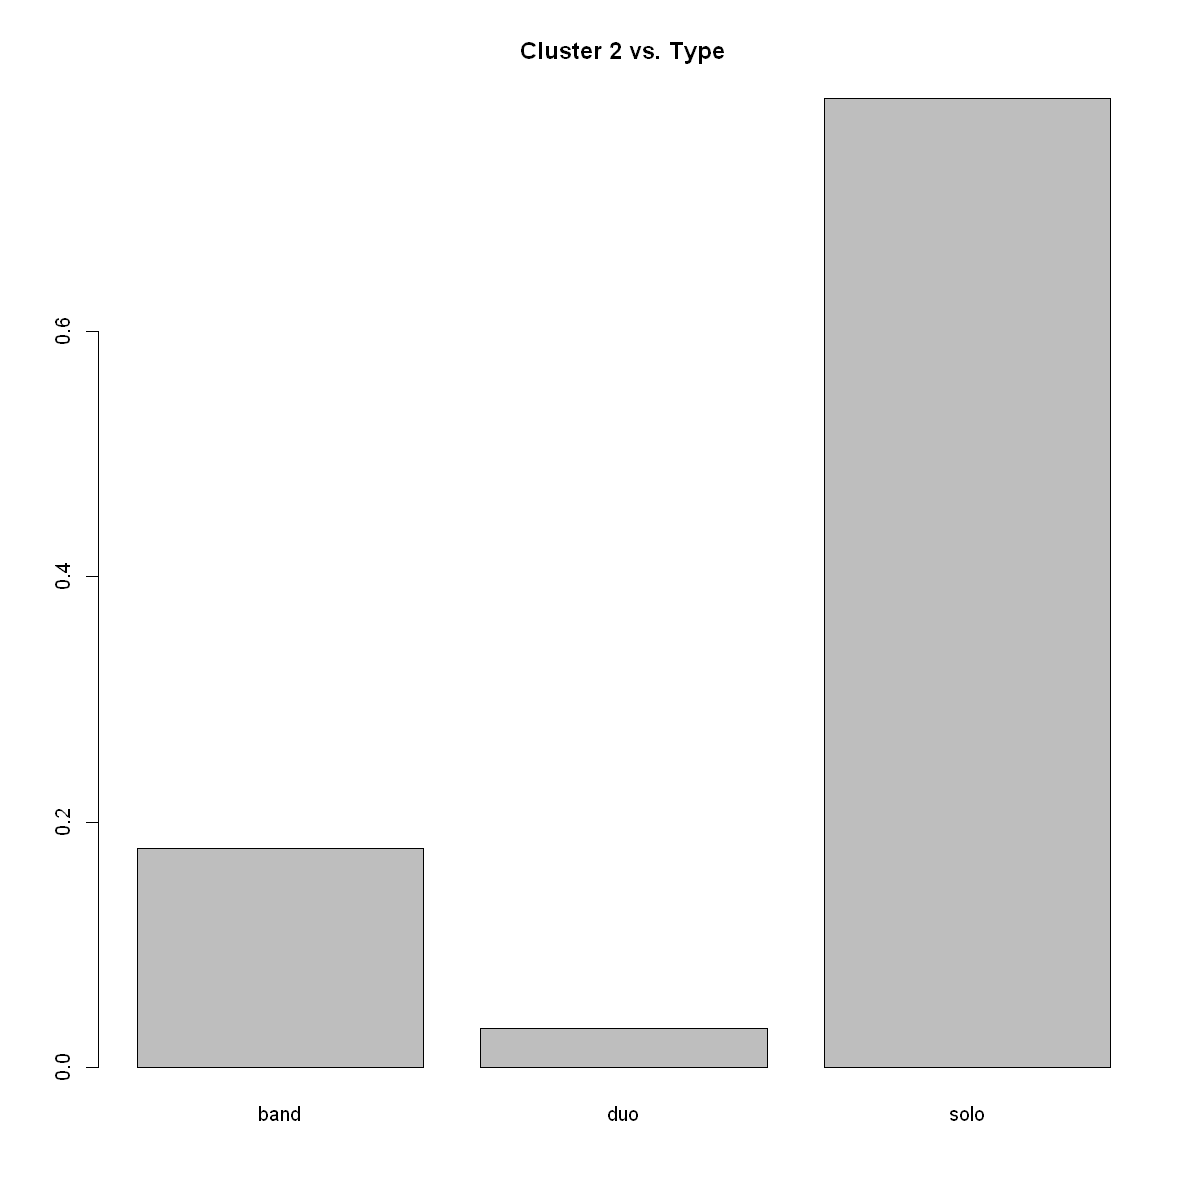

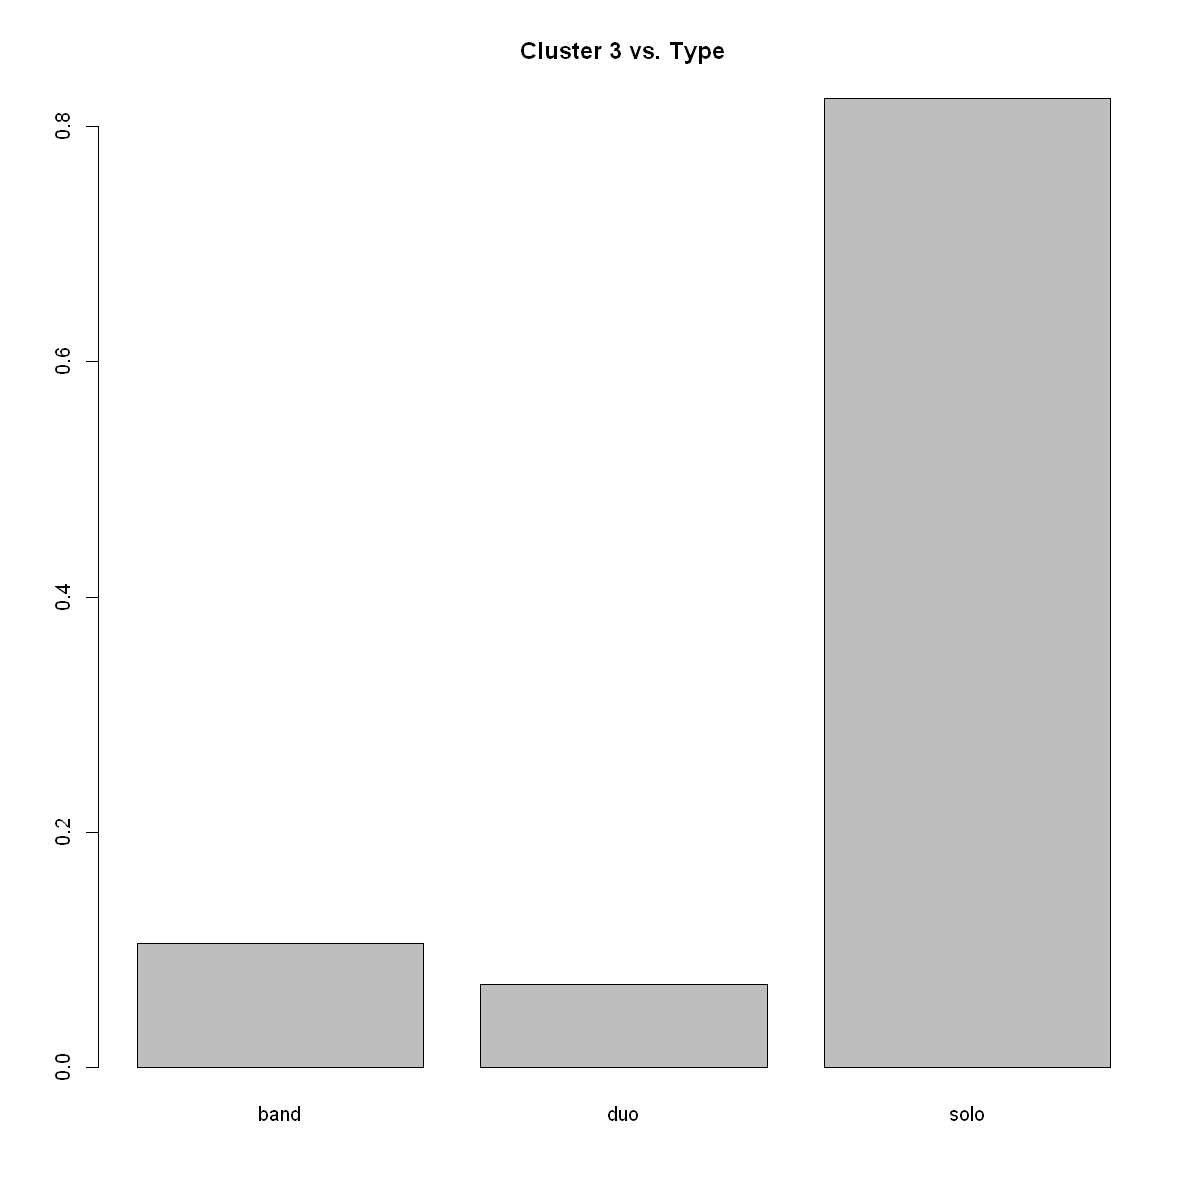

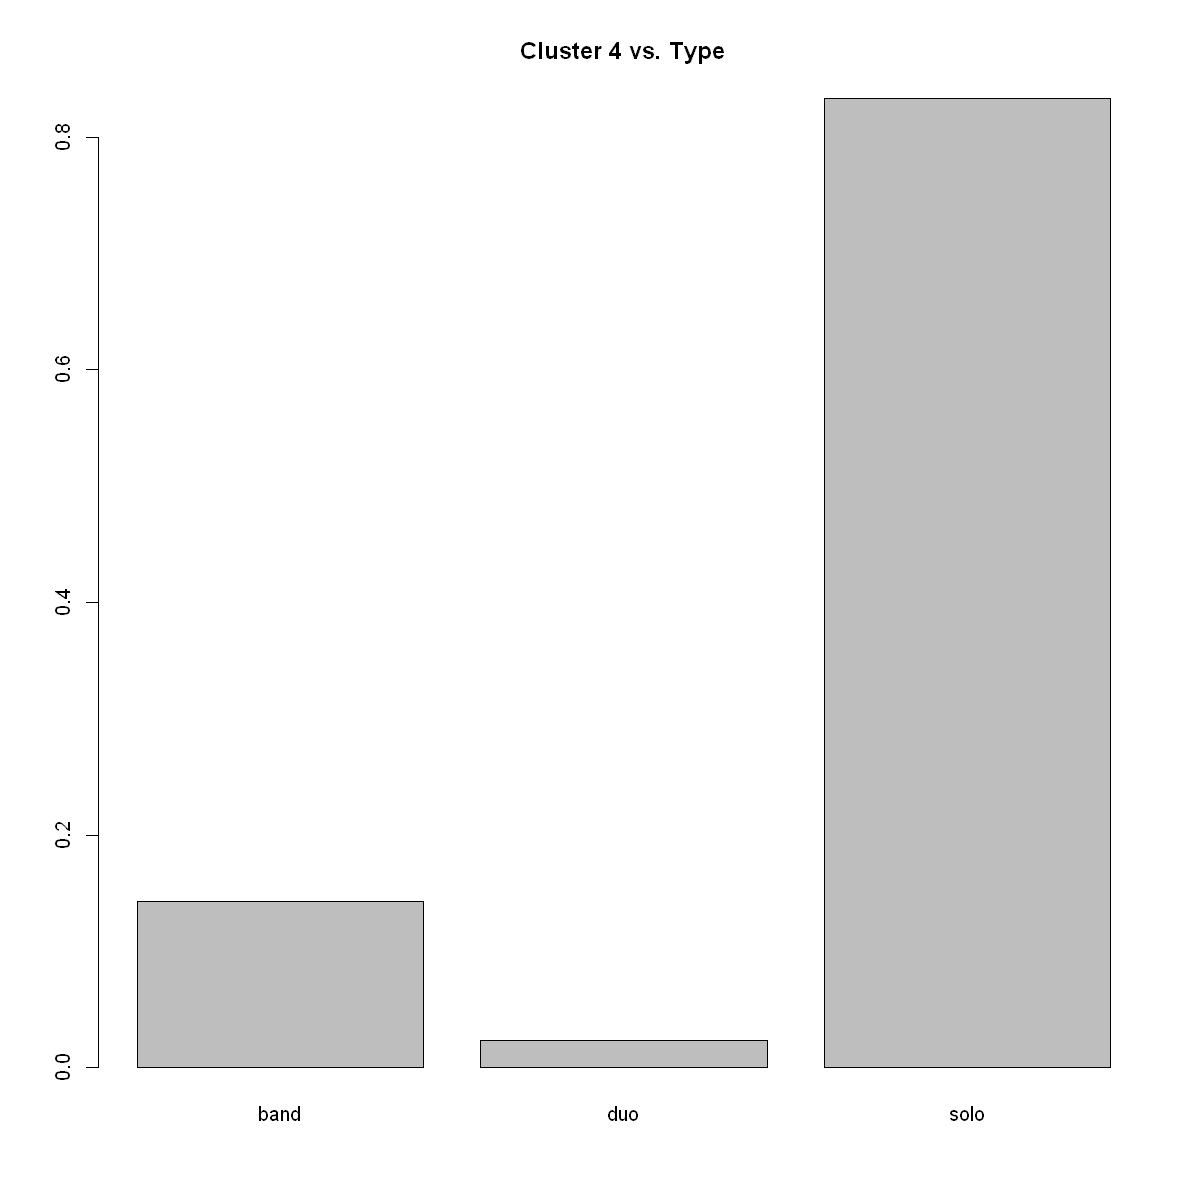

In [56]:
#Barplot of type distribution within each cluster
barplot(prop.table(table(subset(bd,cluster==1)[,17])),main= "Cluster 1 vs. Type")
barplot(prop.table(table(subset(bd,cluster==2)[,17])),main= "Cluster 2 vs. Type")
barplot(prop.table(table(subset(bd,cluster==3)[,17])),main= "Cluster 3 vs. Type")
barplot(prop.table(table(subset(bd,cluster==4)[,17])),main= "Cluster 4 vs. Type")

In [57]:
# Proporções da variável type para cada um dos clusters 
prop.table(table(subset(bd,cluster==1)[,17]))
prop.table(table(subset(bd,cluster==2)[,17]))
prop.table(table(subset(bd,cluster==3)[,17]))
prop.table(table(subset(bd,cluster==4)[,17]))


      band        duo       solo 
0.12087912 0.07692308 0.80219780 


      band        duo       solo 
0.17836257 0.03216374 0.78947368 


      band        duo       solo 
0.10588235 0.07058824 0.82352941 


      band        duo       solo 
0.14285714 0.02380952 0.83333333 

In [58]:
#crosstab
table(bd[,17],bd$cluster)

      
         1   2   3   4
  band  11  61   9  12
  duo    7  11   6   2
  solo  73 270  70  70

         
groups.k4   1   2   3   4
        1  90   8   0  68
        2  19 188  19  37
        3   1   7  44  40
        4  39  17   6  19

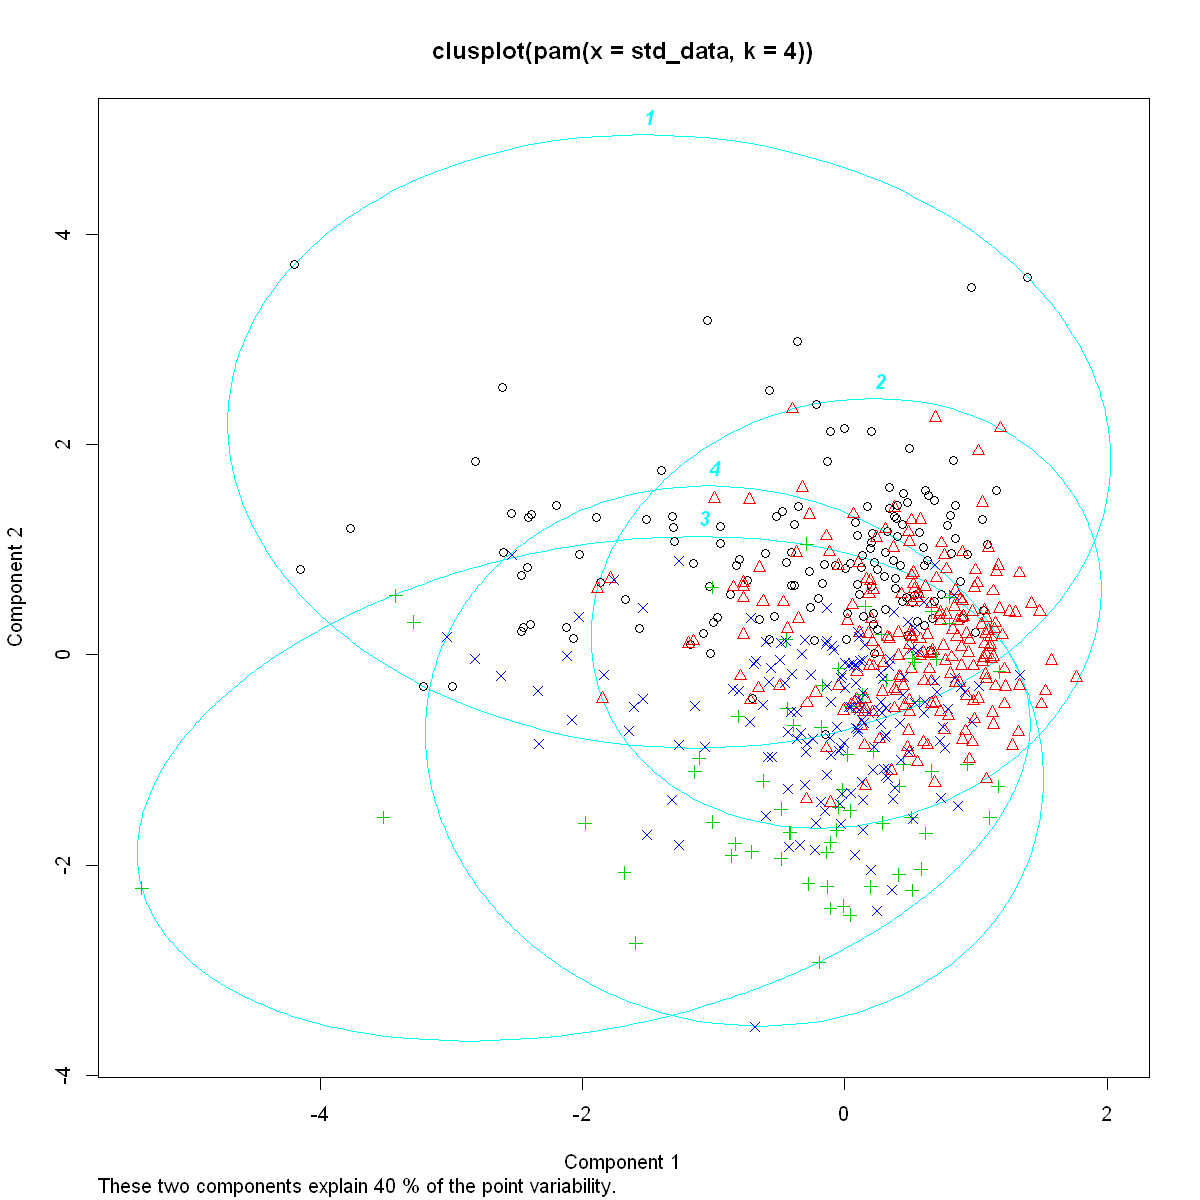

In [59]:
## PAM clustering
std_data <- scale(bd[,18:22])
pam.k4 <- pam(std_data, 4)

#pam.k4 
table(groups.k4,pam.k4$clustering)

# PCA and Clustering
clusplot(pam.k4, labels = 4, col.p = pam.k4$clustering)

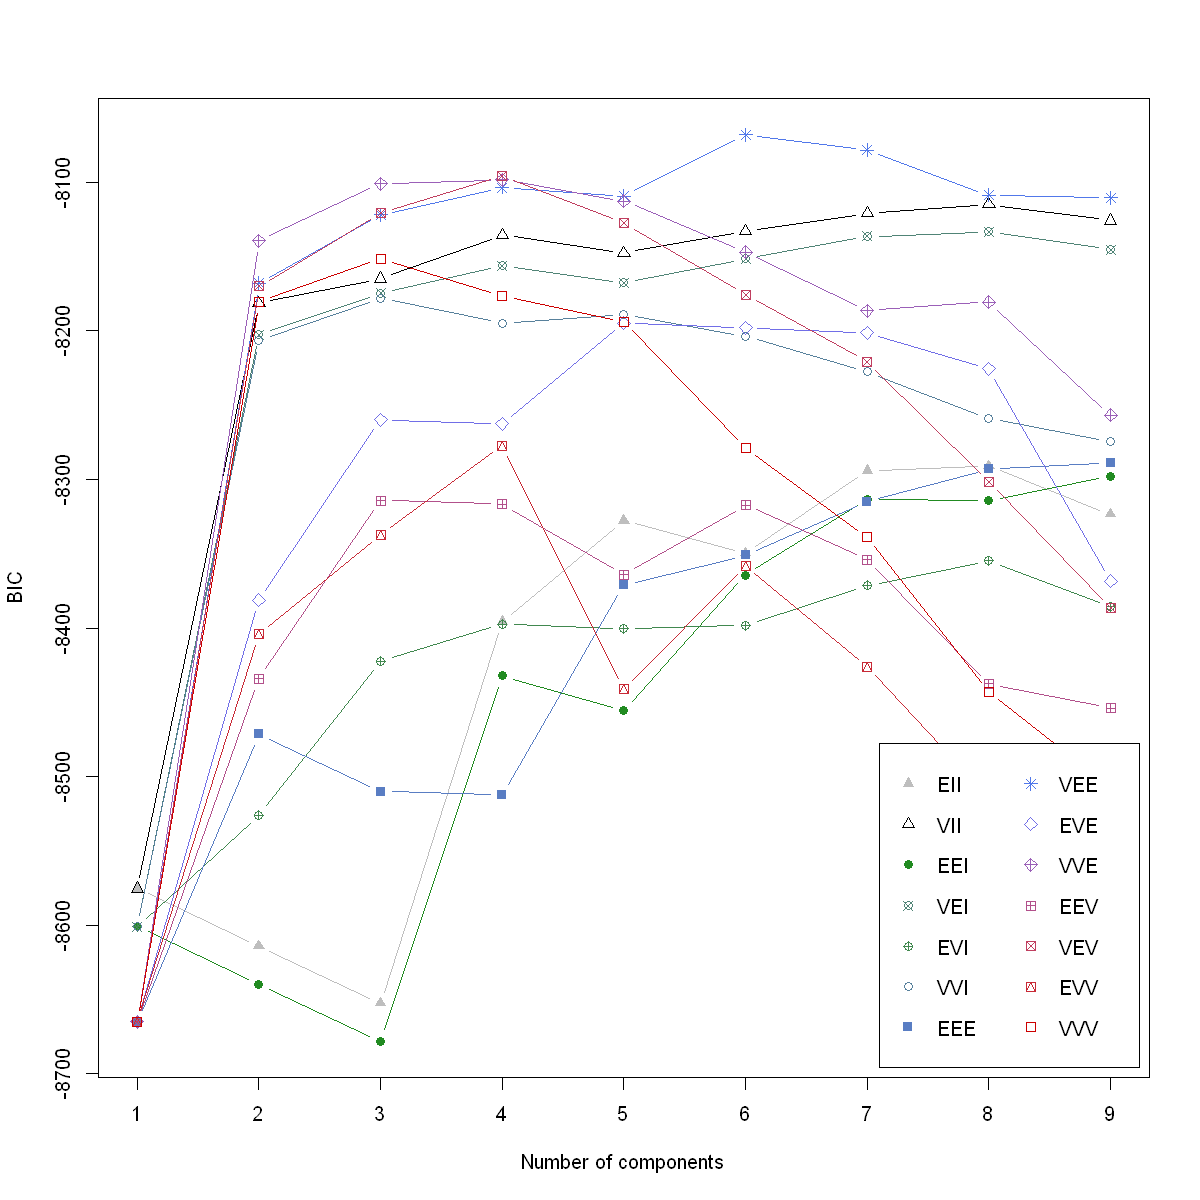

In [60]:
# Probabilistic clustering

# Dataset
data <- bd[,18:22]

# Model selection
BIC <- mclustBIC(data)
plot(BIC)

In [61]:
### GMM
set.seed(1233)

# Apply GMM with 4 components
results.G4 <- Mclust(data, G = 4)
summary(results.G4, parameters = TRUE)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log-likelihood   n df       BIC       ICL
      -3820.654 602 71 -8095.726 -8304.172

Clustering table:
  1   2   3   4 
 54  83 303 162 

Mixing probabilities:
        1         2         3         4 
0.1036184 0.1489917 0.4746121 0.2727777 

Means:
                     [,1]        [,2]        [,3]      [,4]
eletronic      -0.1129248 -1.56020207  0.39415078 0.2092896
sad_long_songs  1.3243013  0.04453429 -0.45661008 0.2670871
rap             1.2763264 -0.57199746 -0.21022357 0.1933684
slows           0.4530015  0.10839885 -0.30430728 0.2981845
popular        -0.6454179 -0.18644902 -0.07703663 0.4810476

Variances:
[,,1]
                 eletronic sad_long_songs        rap      slows    popular
eletronic       0.76864438    -0.06164907 -0.4002395 -0.4433224 -0.

In [62]:
# Some results
results.G4$modelName          # Optimal selected model
results.G4$G                  # Optimal number of cluster 
head(results.G4$z, 5)         # Probability to belong to a given cluster
head(results.G4$classification, 5) # Cluster assignment of each observation

[1] "VEV"

[1] 4

1.926608e-02,0.001155275,3.771872e-02,9.418599e-01
5.967387e-02,0.025790872,3.180544e-07,9.145349e-01
7.652298e-07,0.999999233,1.623727e-14,1.888311e-09
2.417357e-02,0.713976821,1.524330e-06,2.618481e-01
3.153686e-02,0.000264756,3.896913e-04,9.678087e-01


[1] 4 4 2 2 4

O modelo selecionado é o VEV que apresenta um volume diferente, uma forma igual e uma orientação que varia.

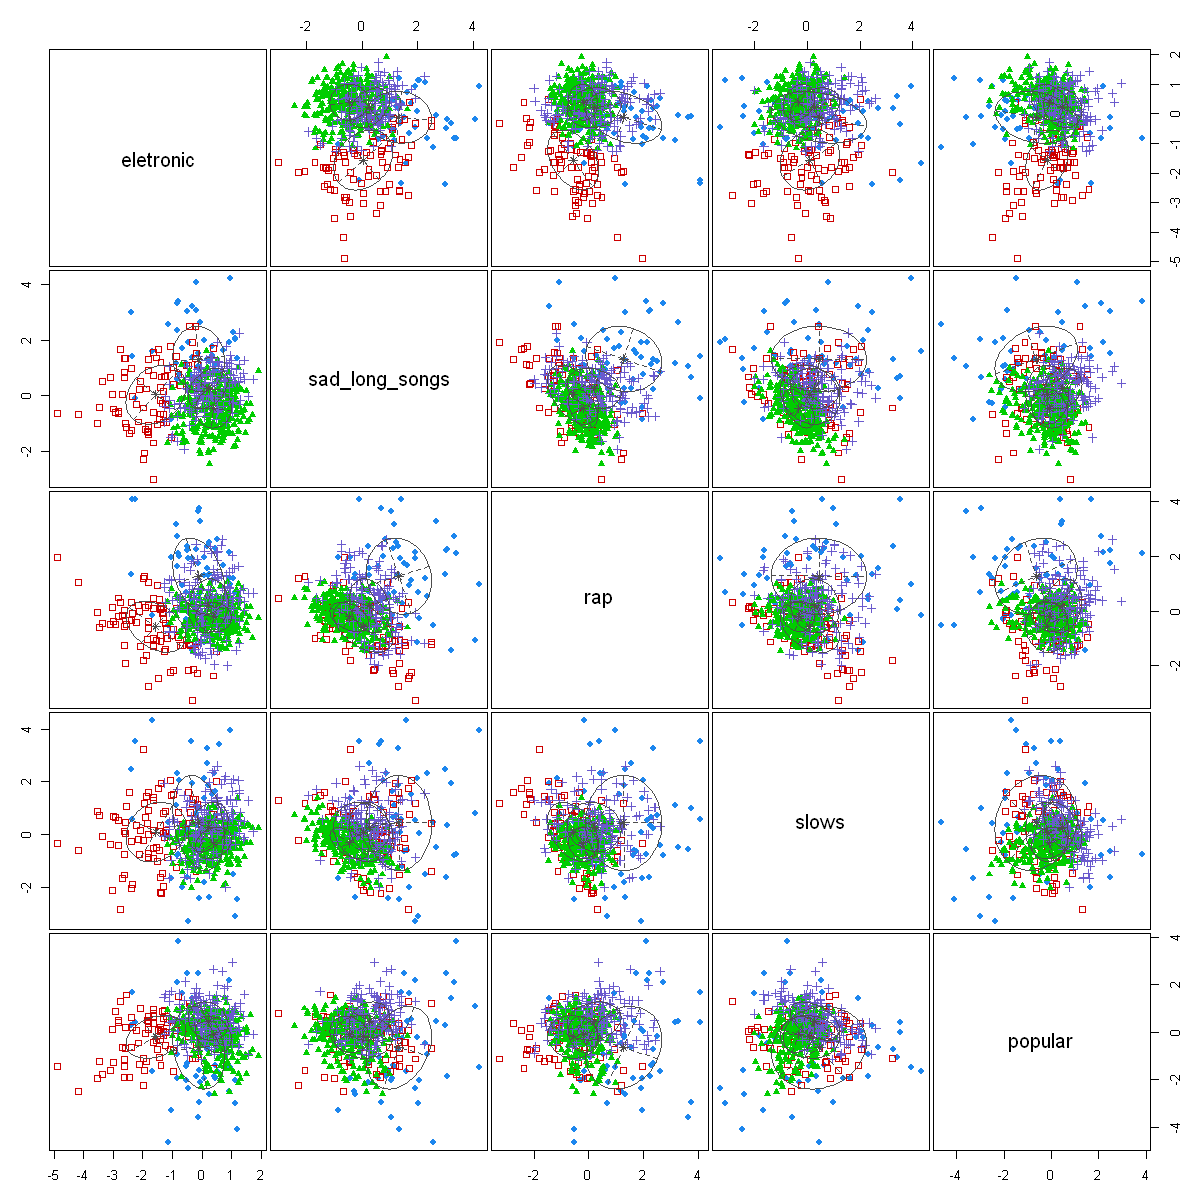

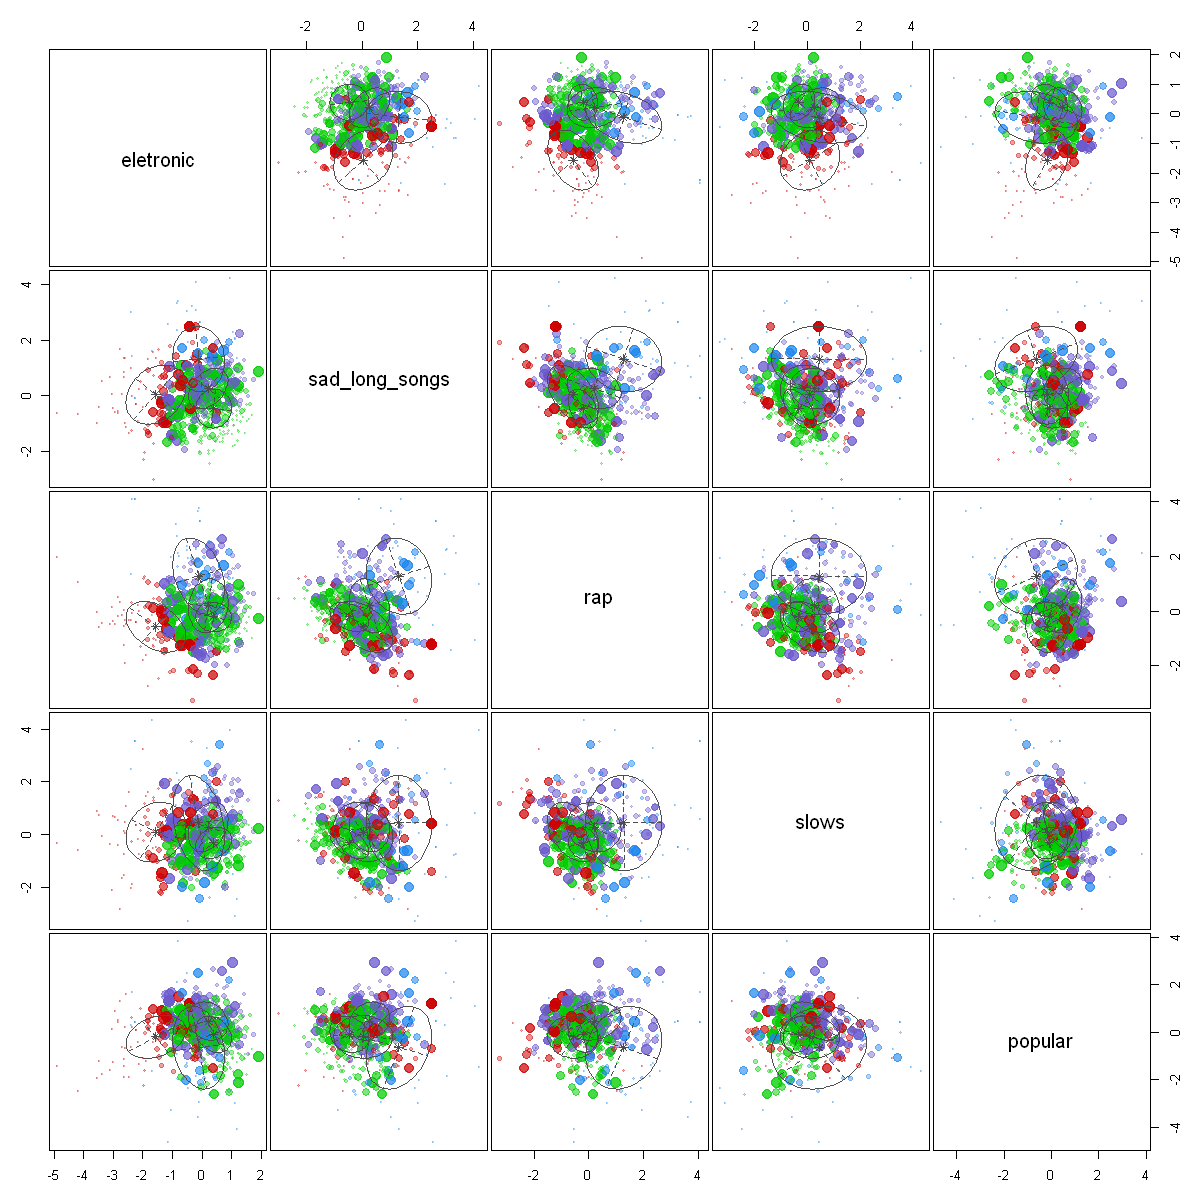

In [63]:
plot(results.G4, what = "classification")
plot(results.G4, what = "uncertainty")

Ao analisar o primeiro gráfico, conclui-se que os 4 clusters se apresentam sobrepostos, não havendo uma separação bem definida entre eles. Ainda assim, em alguns gráficos consegue-se destacar um cluster de entre os restantes.
Para além disto, no segundo gráfico verifica-se incerteza em todos os clusters.